# $$PCA$$

## Task 1: Exploratory Data Analysis (EDA):
1.	Load the dataset and perform basic data exploration.
2.	Examine the distribution of features using histograms, box plots, or density plots.
3.	Investigate correlations between features to understand relationships within the data.

### a) Descriptive Statistics

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200
%matplotlib inline

In [4]:
df = pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


* there are no null entries in any column
* mean and median for all the column are more or less equal, so it implies that the distribution of all the columns is close to symmetric
* there is significant difference between 25th percentile and minimum, also between 75th percentile and maximum, so the column Proline might have some outliers at both the ends

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


* all the column are numeric and there are no null entries

### b) Visualization

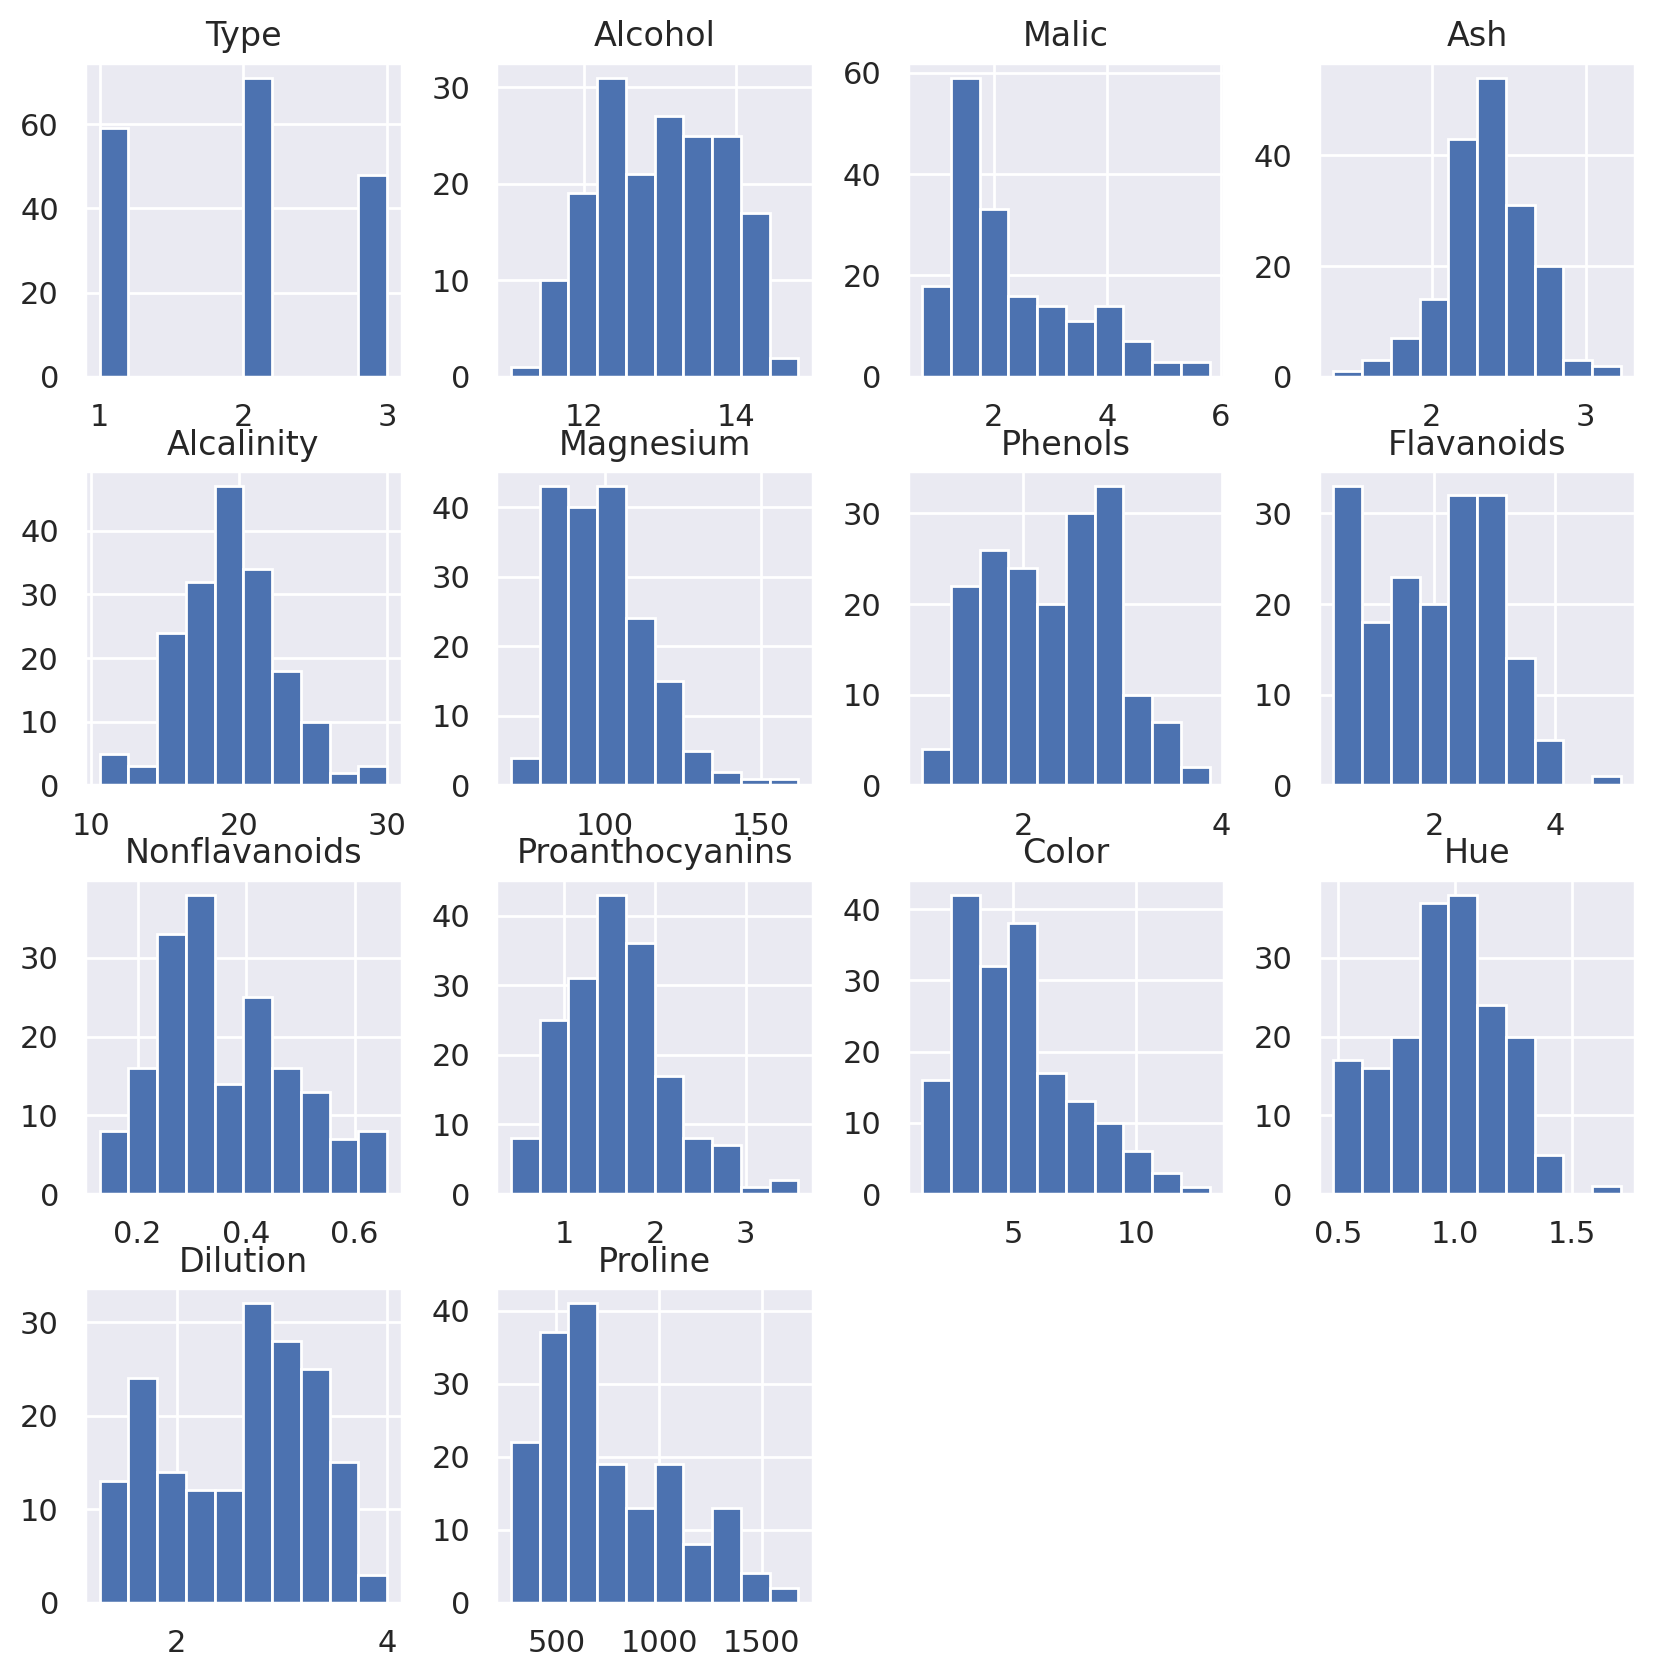

In [7]:
# Histogram
df.hist(figsize=(10,10))
plt.show()

* Column "Type" is having only three different values in it 1,2,3. So it seems like a catagorical column
* Columns "Malic", "Magnesium", "Color" and "Proline" are left skewed, so there might be outliers at higher sides

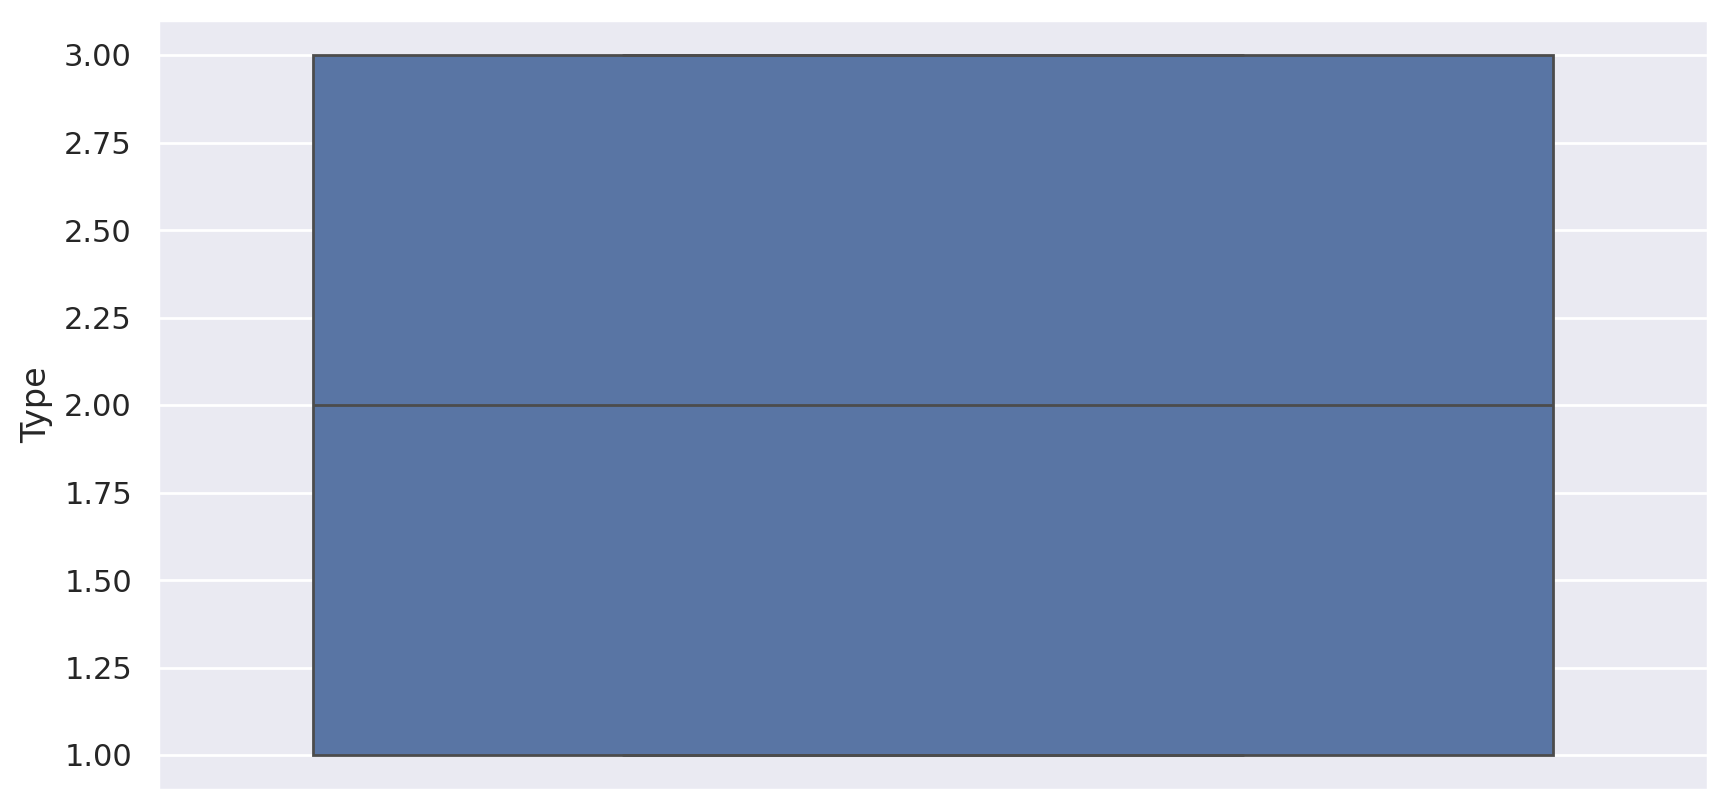

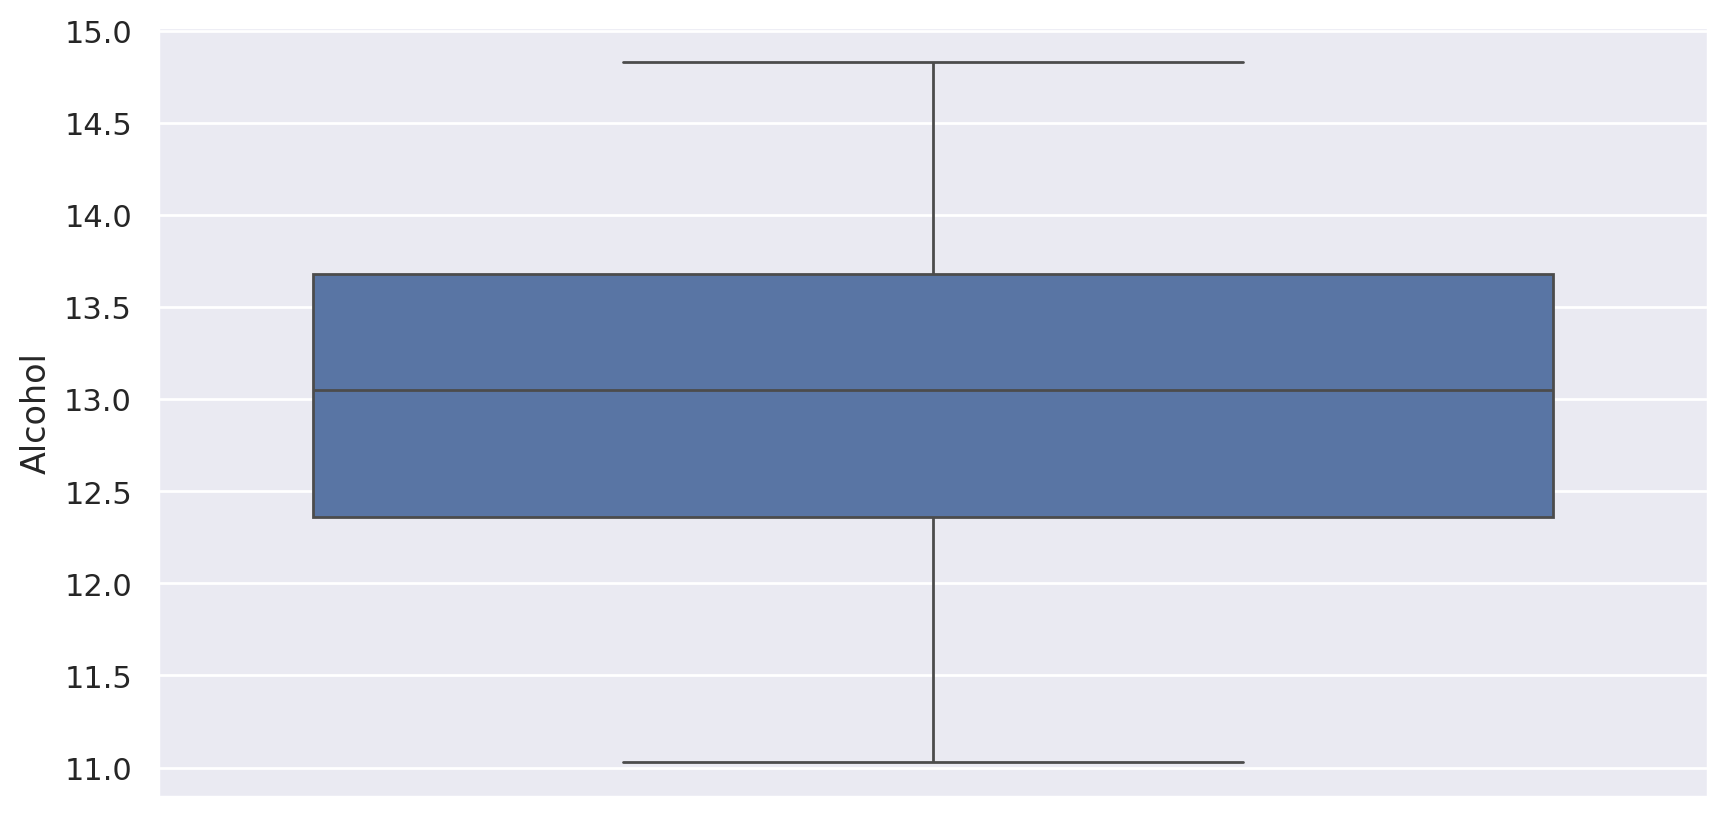

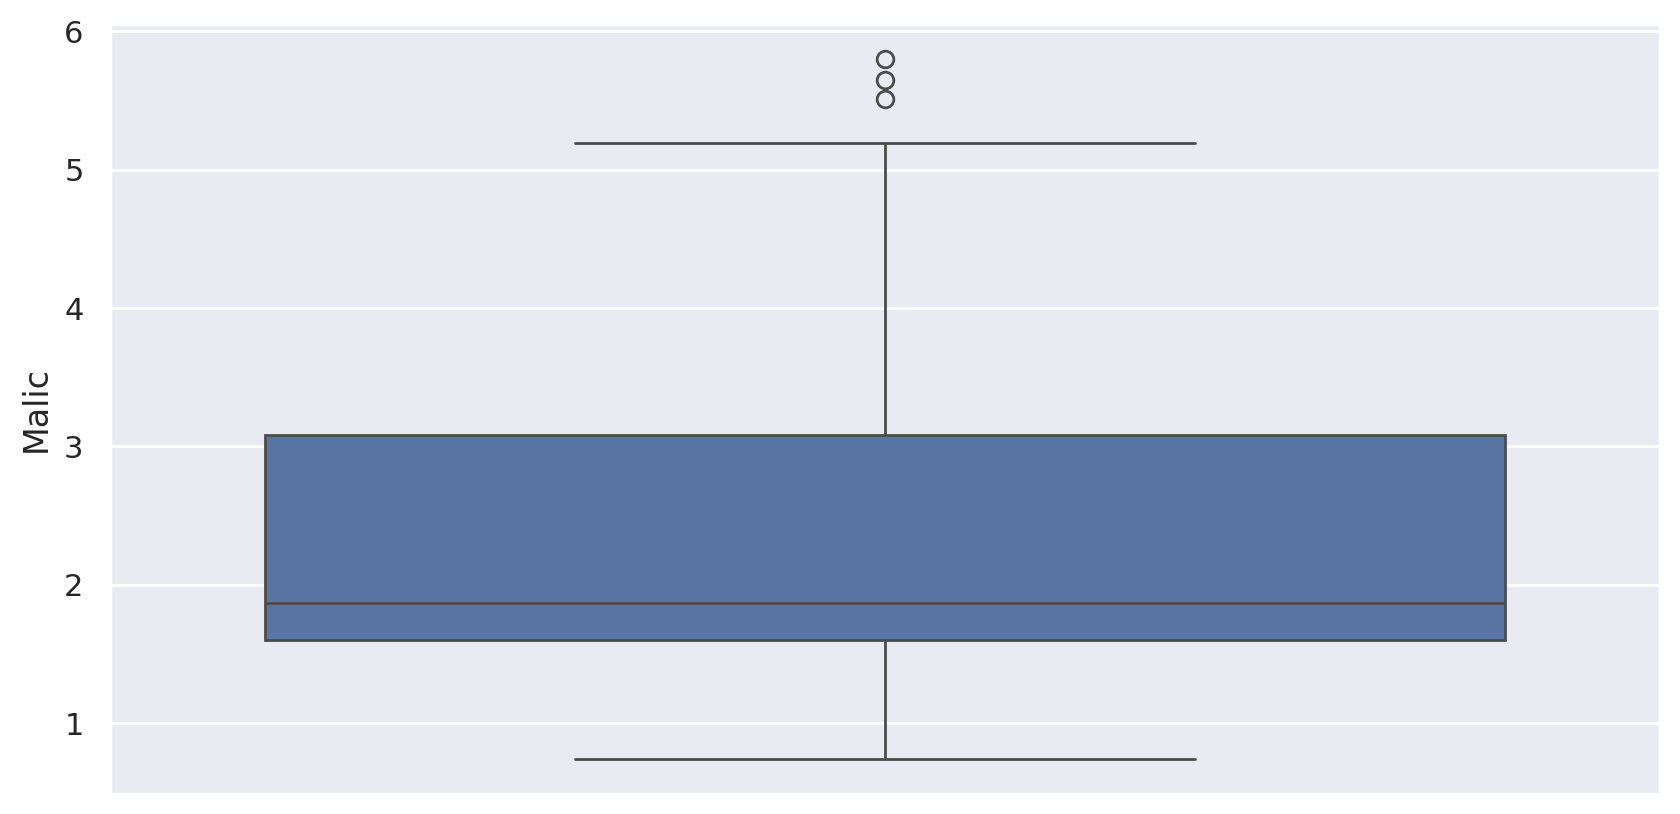

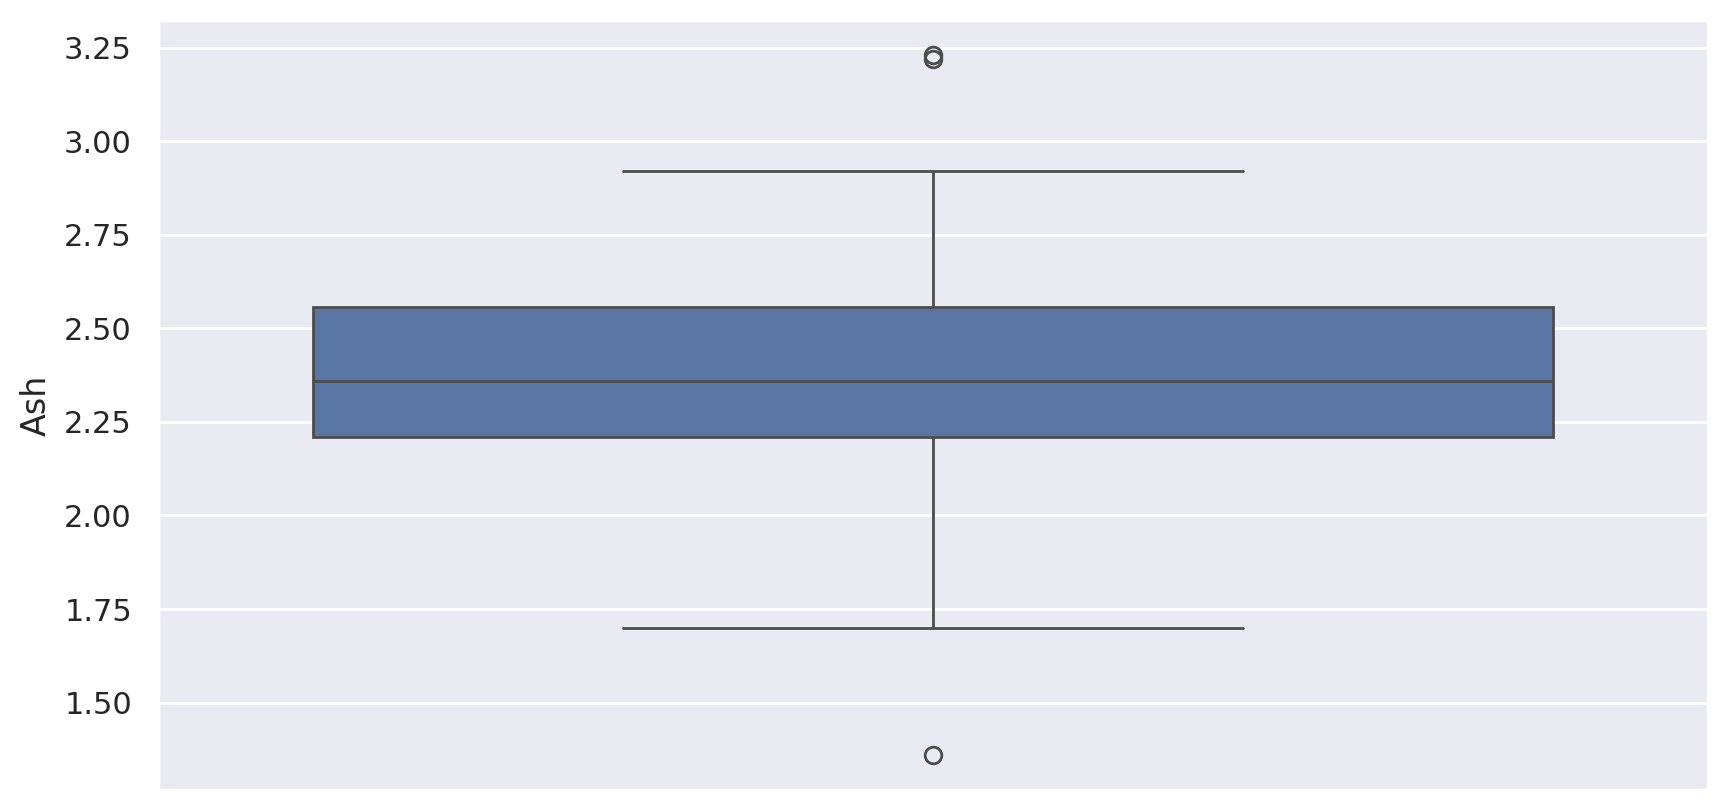

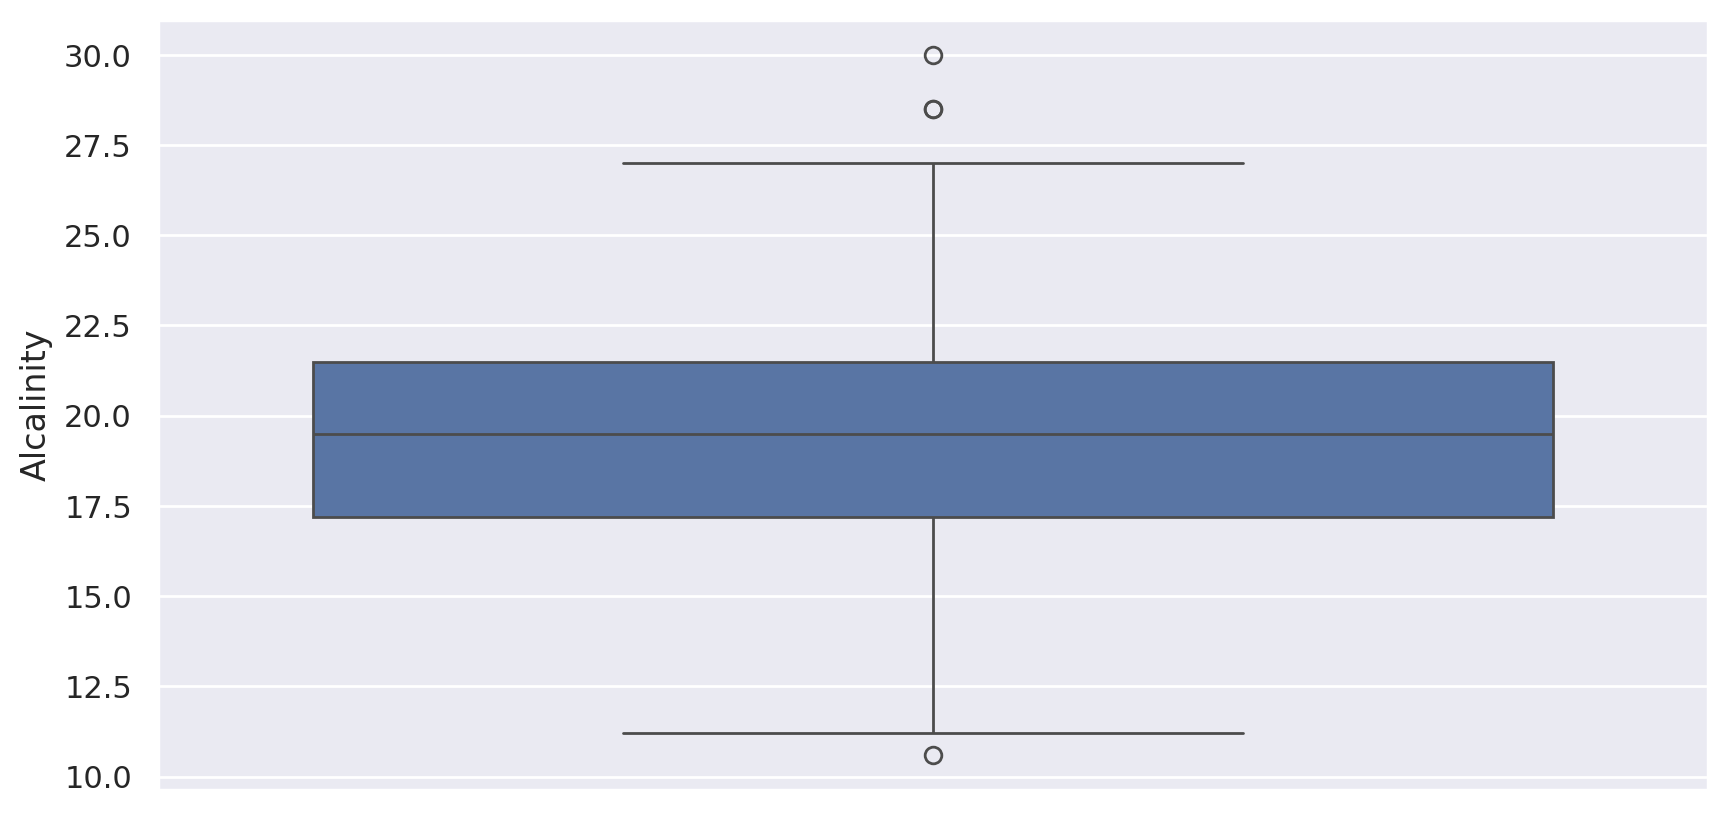

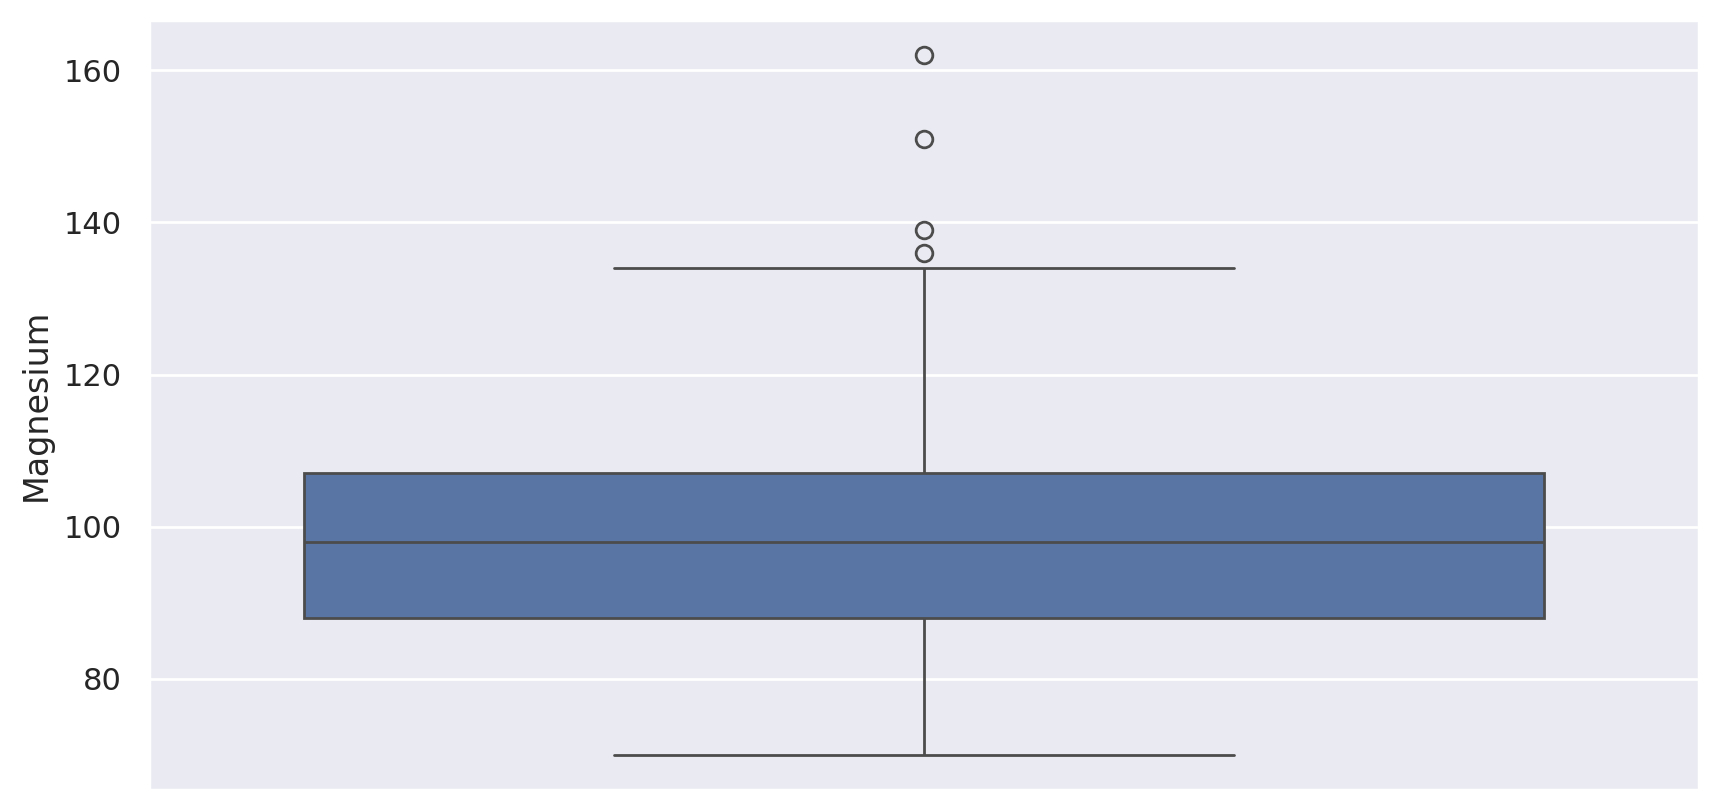

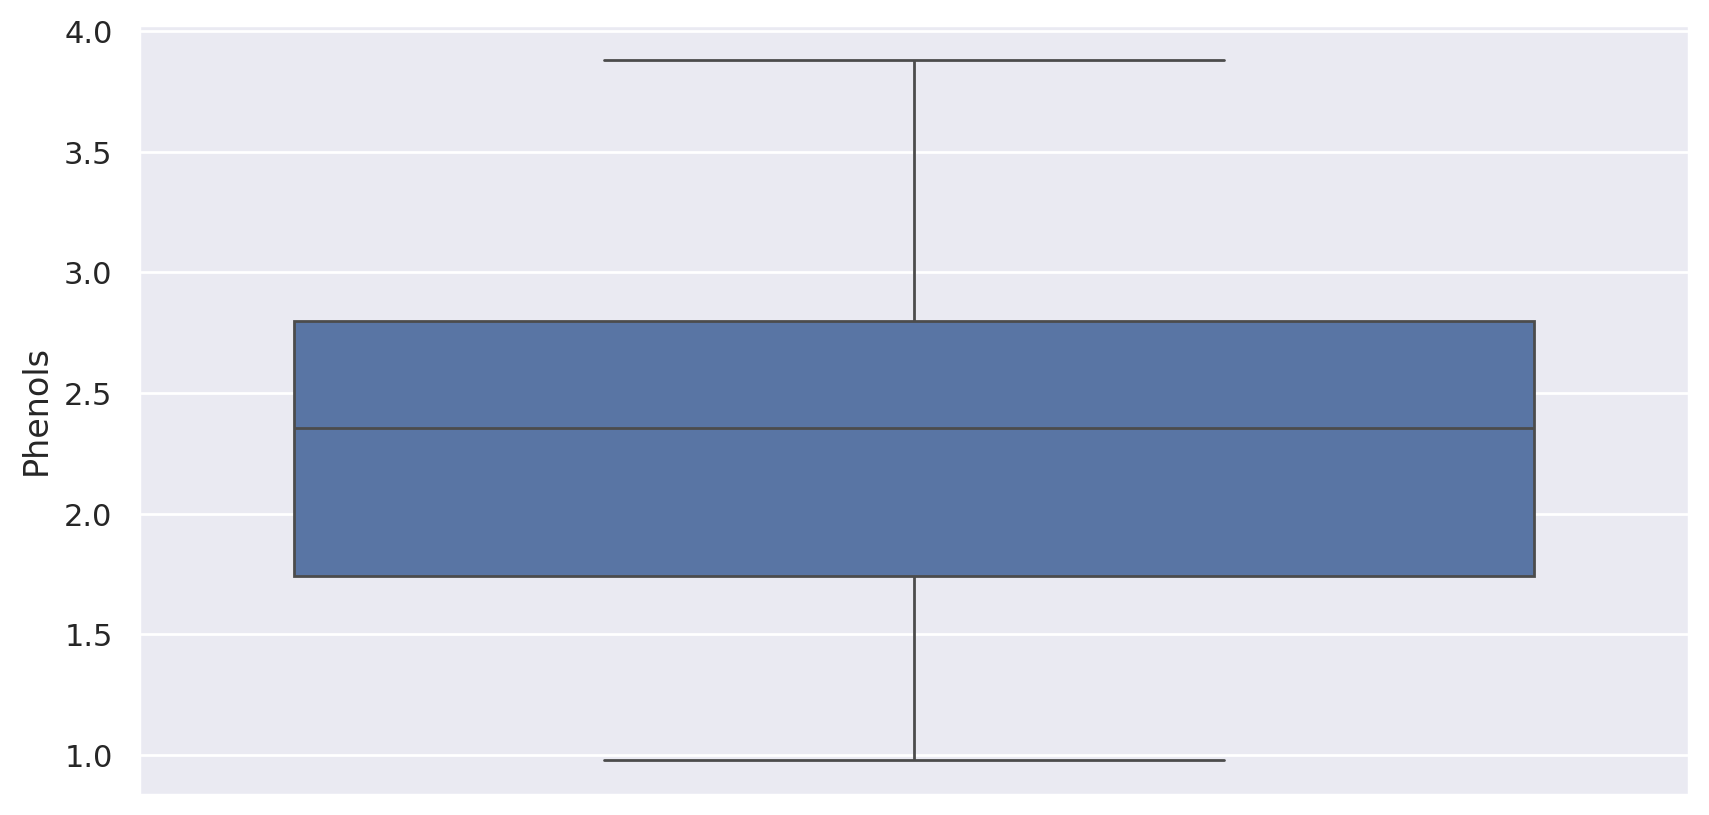

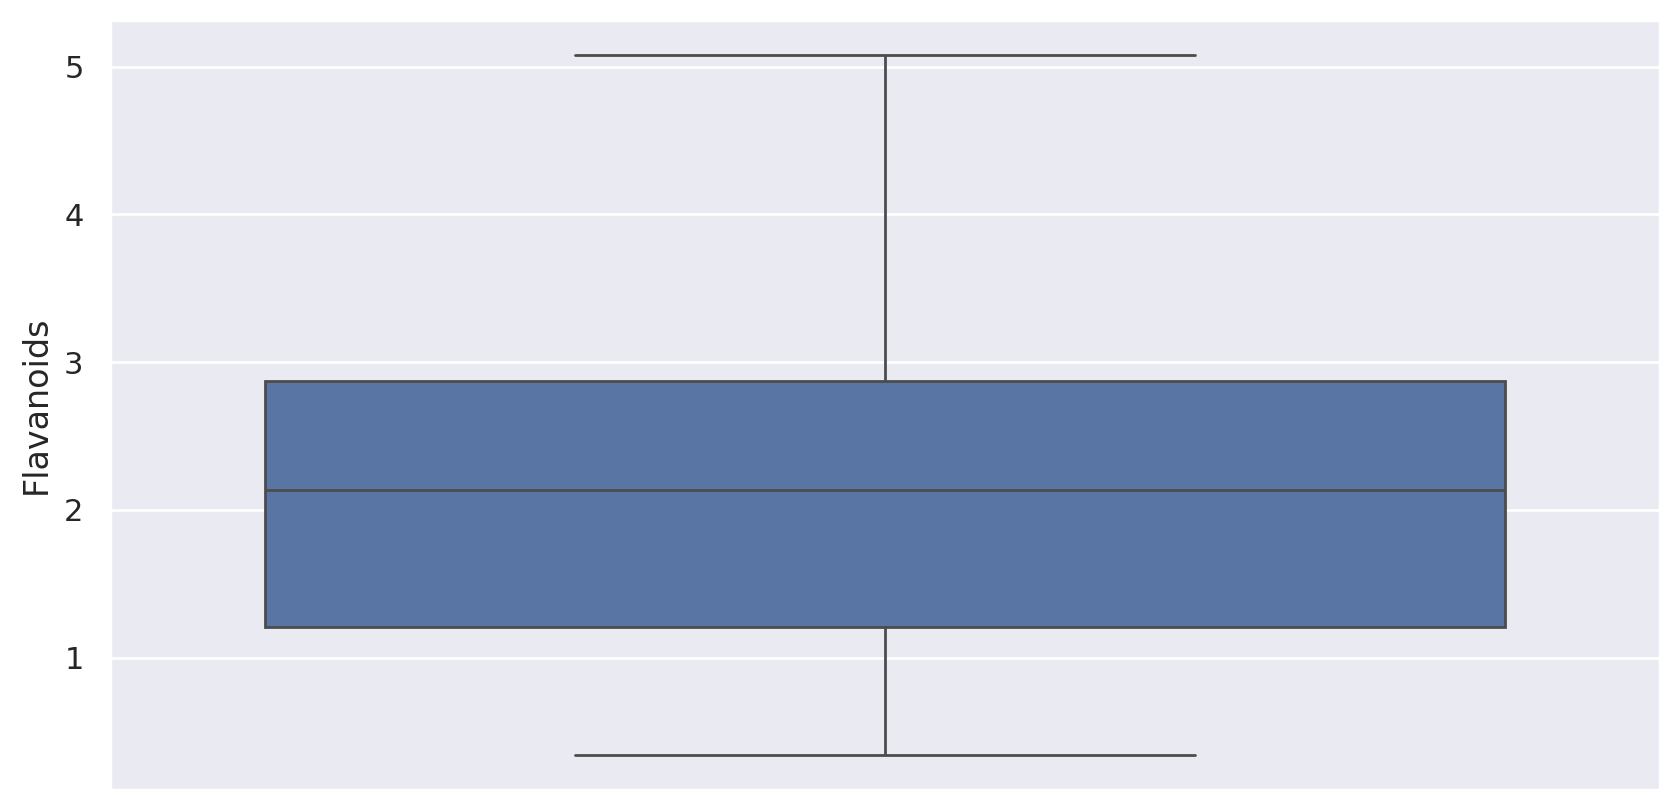

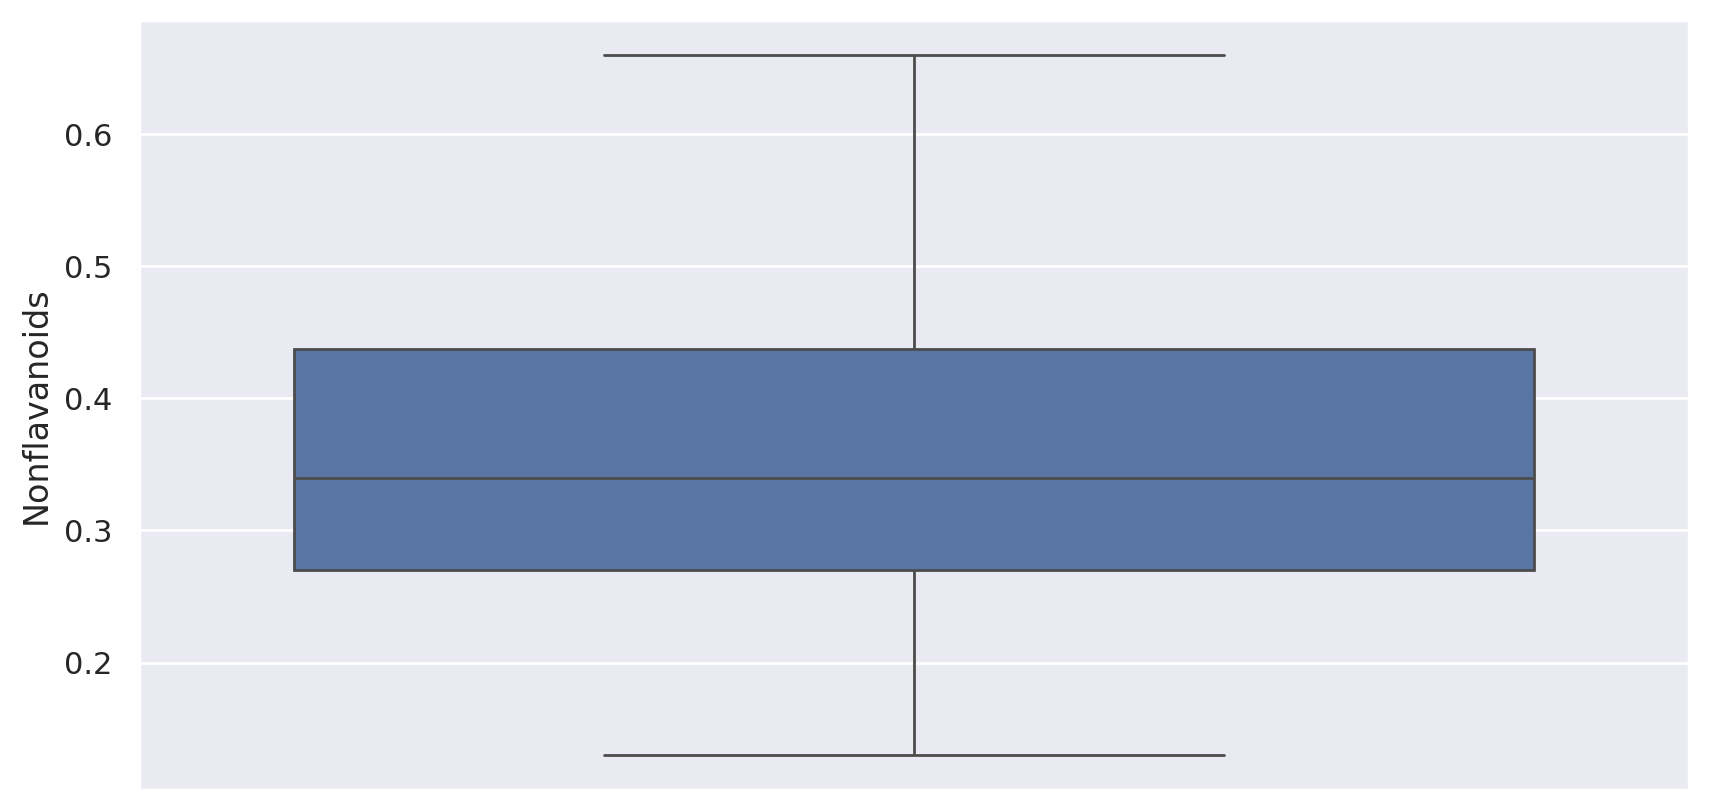

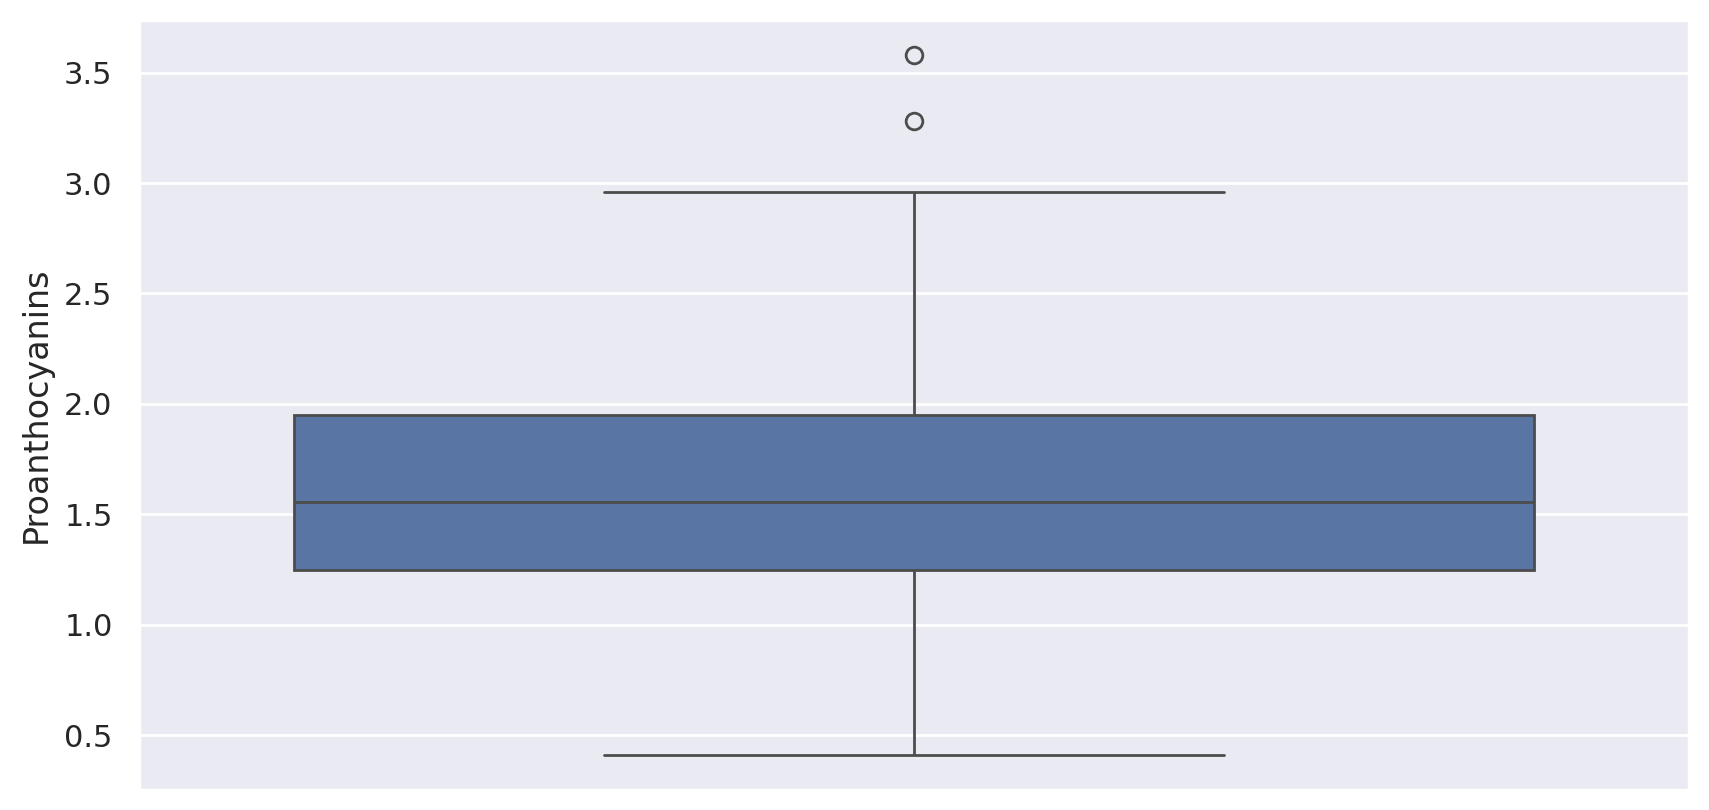

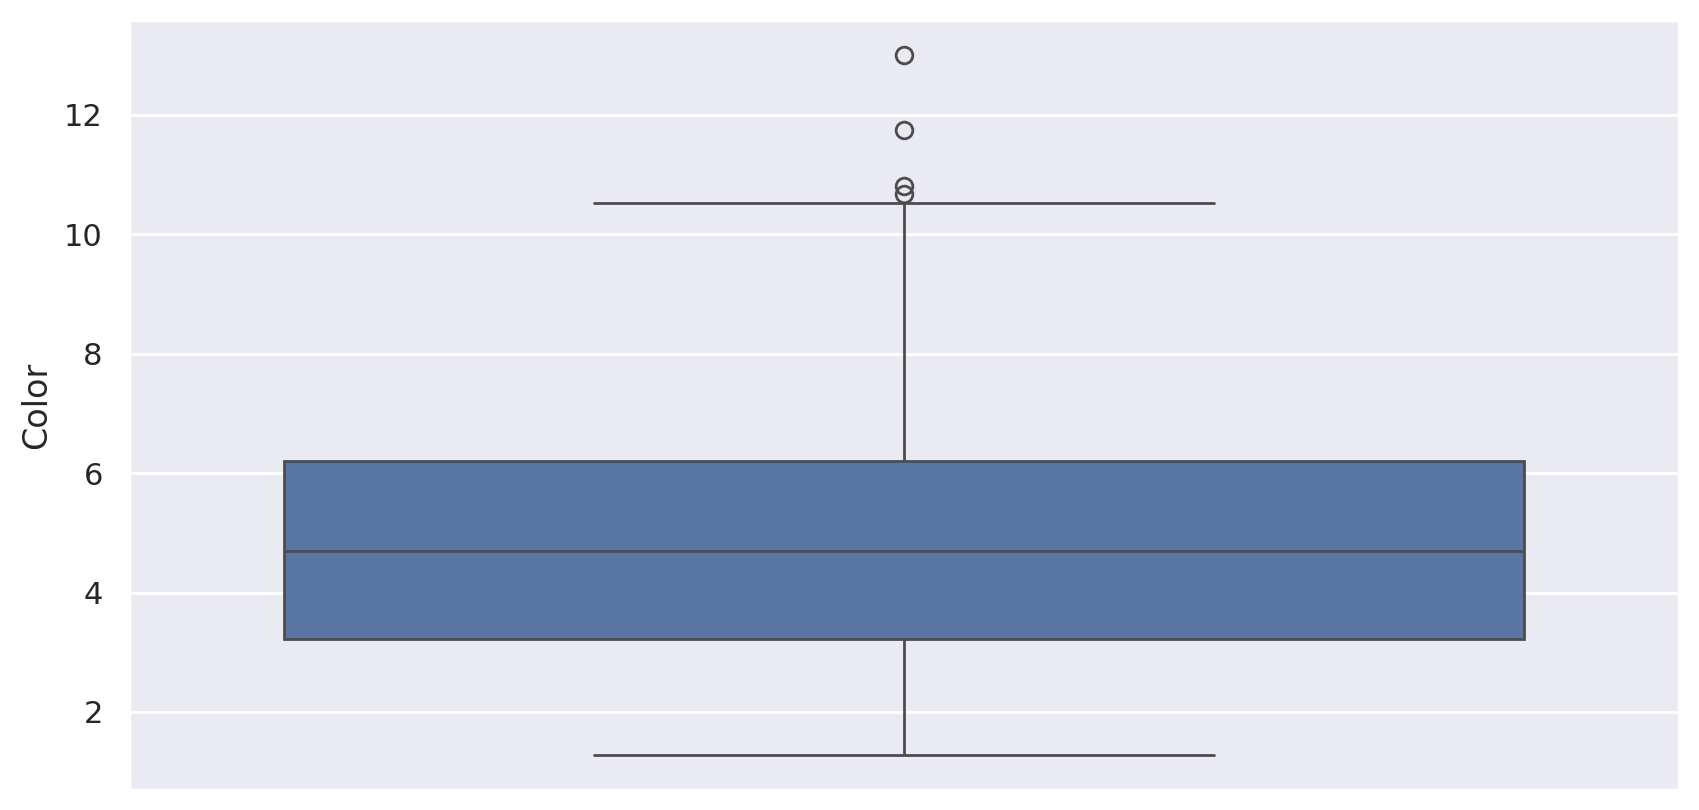

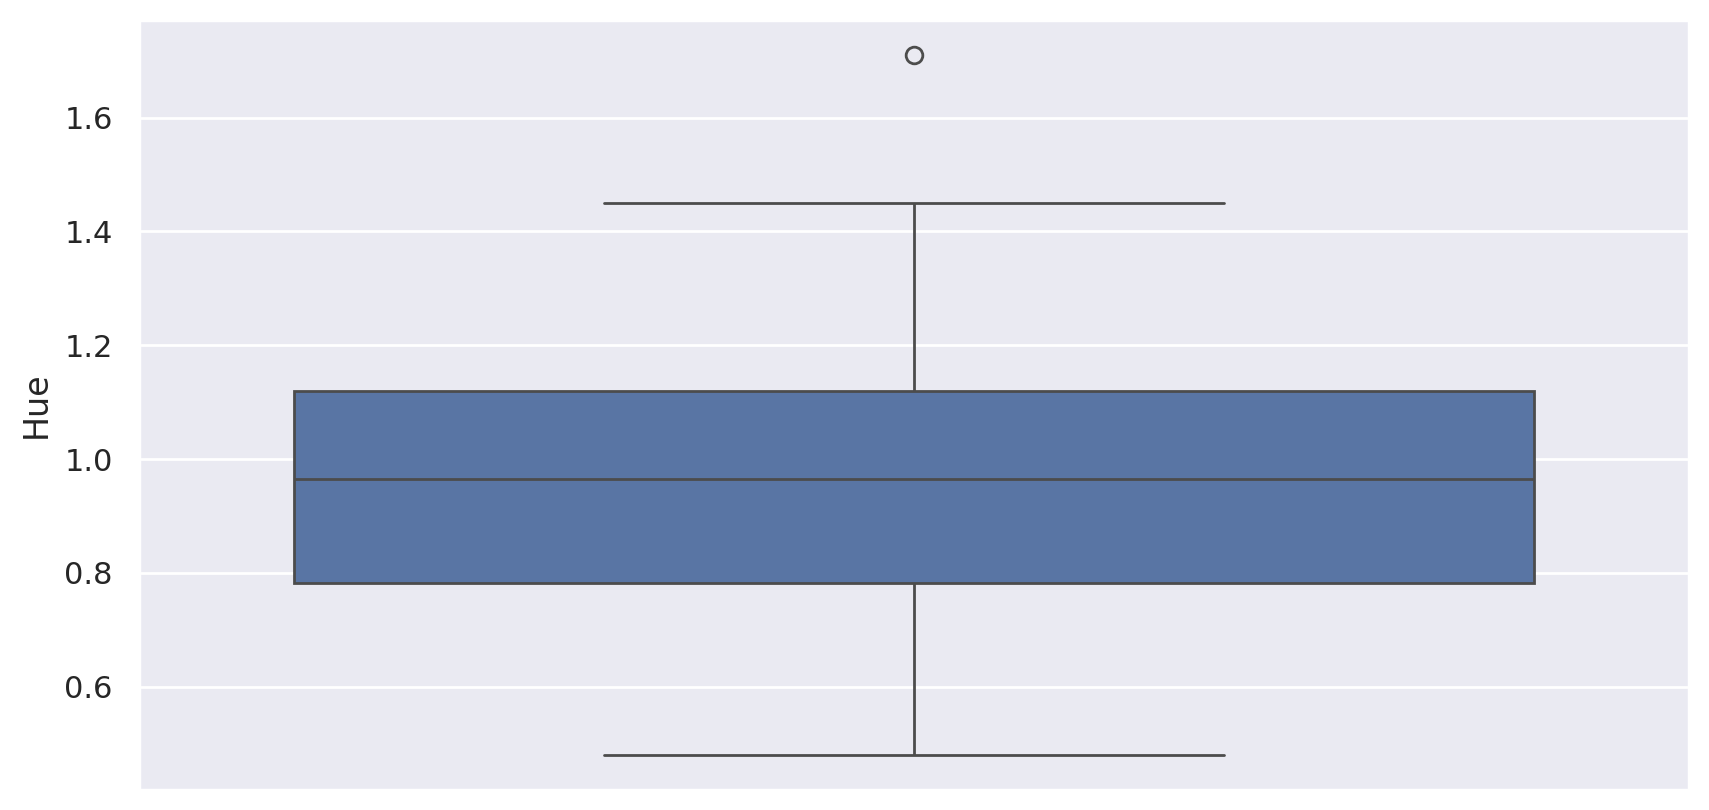

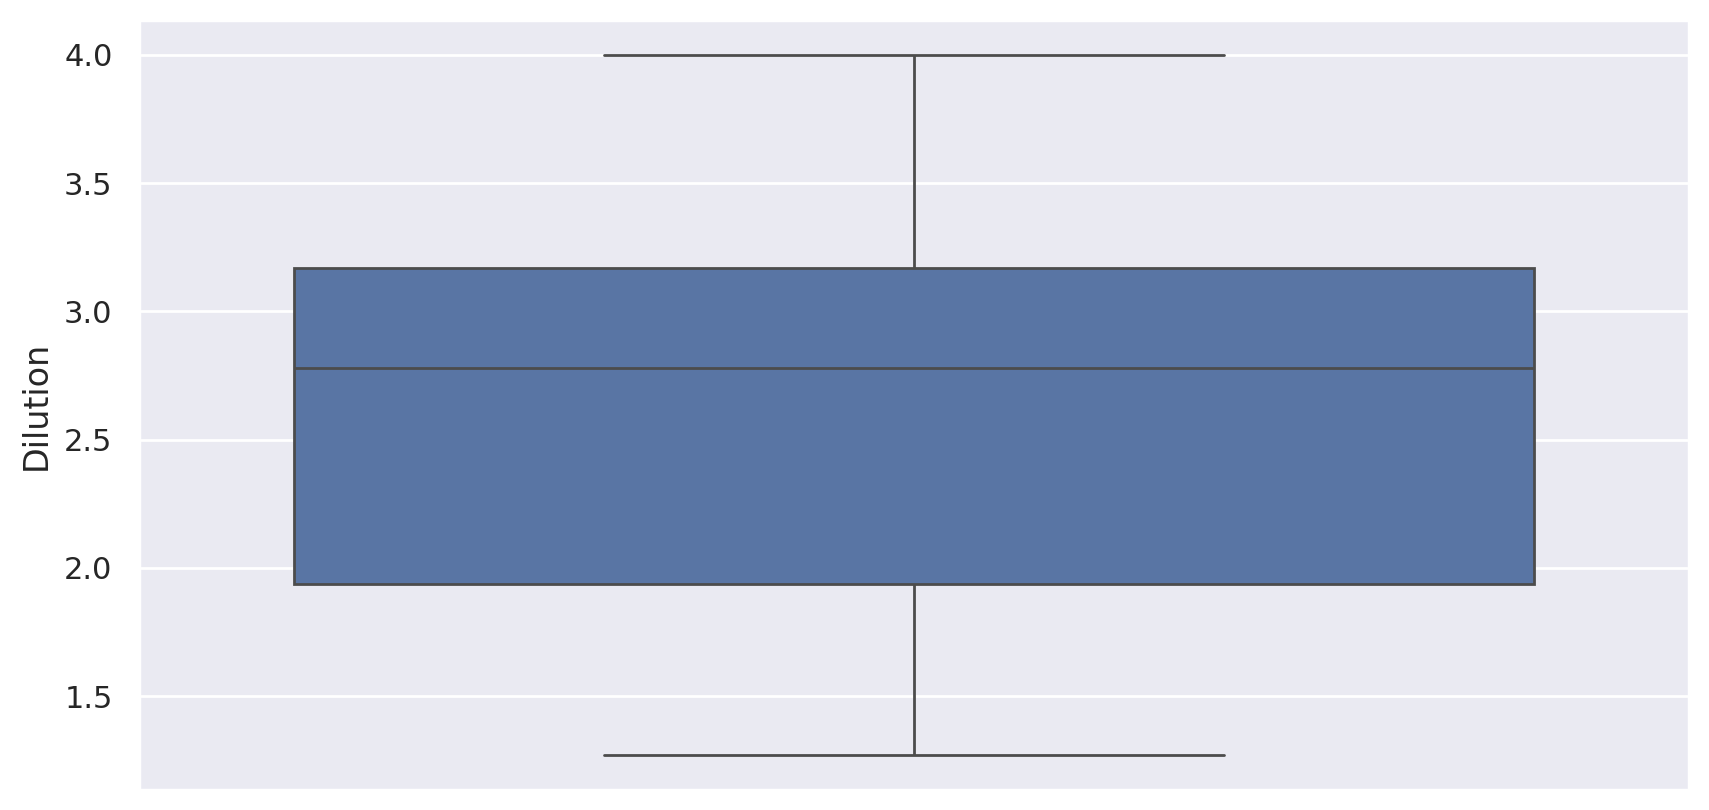

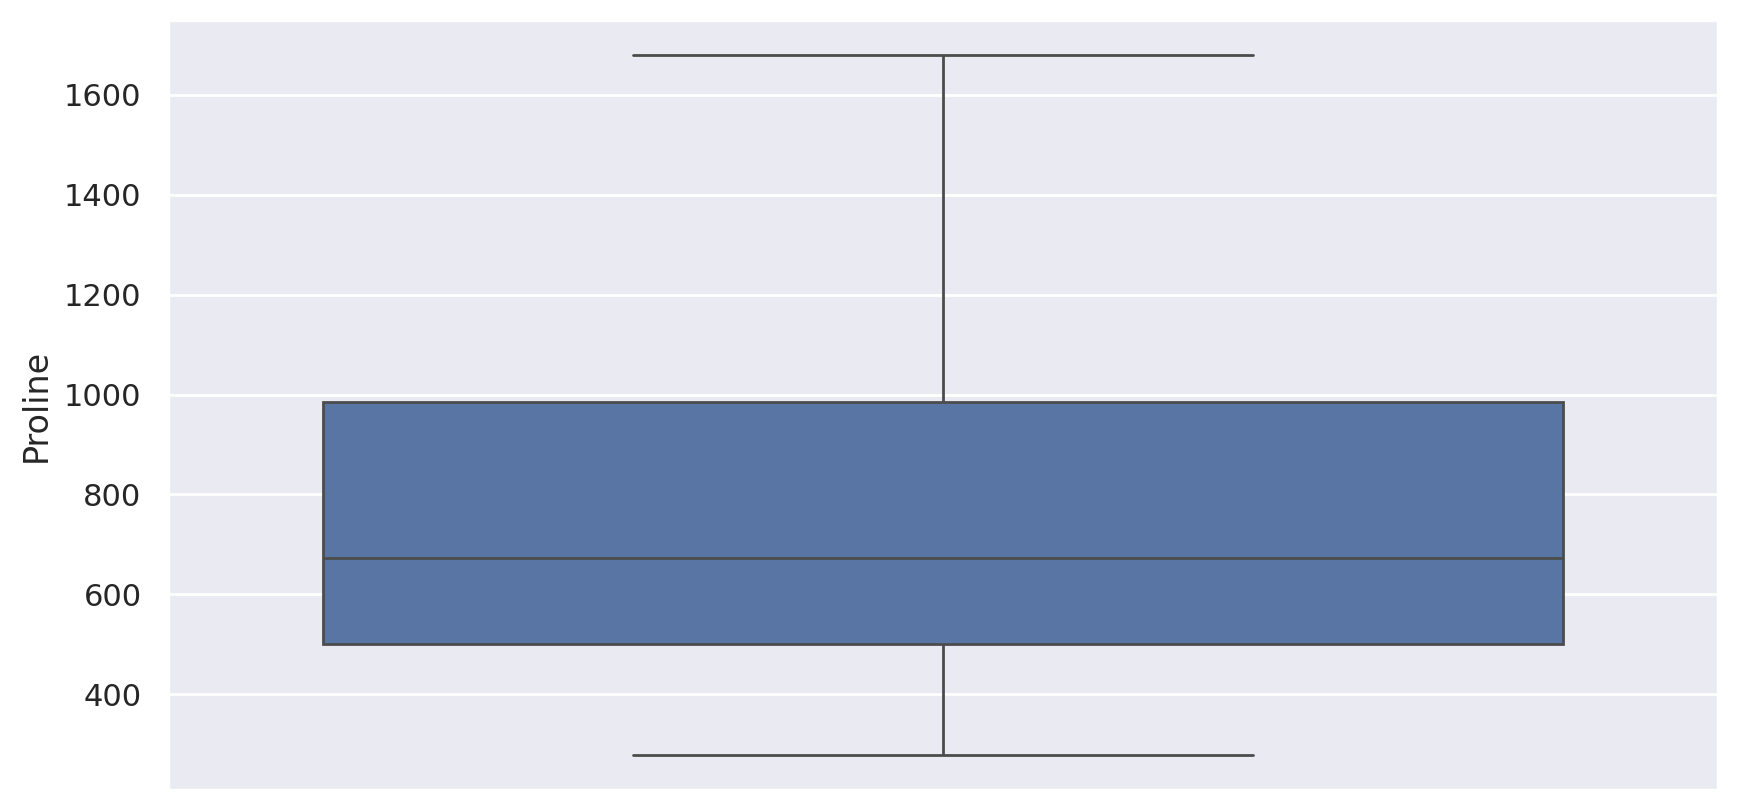

In [8]:
# Box Plots
for col in df.columns:
    sns.boxplot(data=df[col])
    plt.show()

* Columns "Malic", "Ash", "Alcalinity", "Magnesium", "Proanthocyanins", "Color", "Hue" conatins outliers

#### We will use capping method to handle outliers.

In [9]:
data = df.copy()

# Outliers are present in the following columns
outliers_columns = list(df.columns)

# outlier_detection
def outlier_detection(data, col_name):
    Q1 = data[col_name].quantile(0.25)
    Q3 = data[col_name].quantile(0.75)
    IQR = Q3-Q1
    LE = Q1 - 1.5*IQR
    UE = Q3 + 1.5*IQR
    #return data.index[(data[col_name] < LE) | (data[col_name] > UE)].tolist()
    return LE,UE

# Dictionary for lower and upper extreme
LU_Extremes = {}
for col in outliers_columns:
    LU_Extremes[col] = outlier_detection(data, col)
LU_Extremes

# Outliers Capping
for col in LU_Extremes:
    data.loc[data[col] < LU_Extremes[col][0] , col]=LU_Extremes[col][0]
    data.loc[data[col] > LU_Extremes[col][1] , col]=LU_Extremes[col][1]

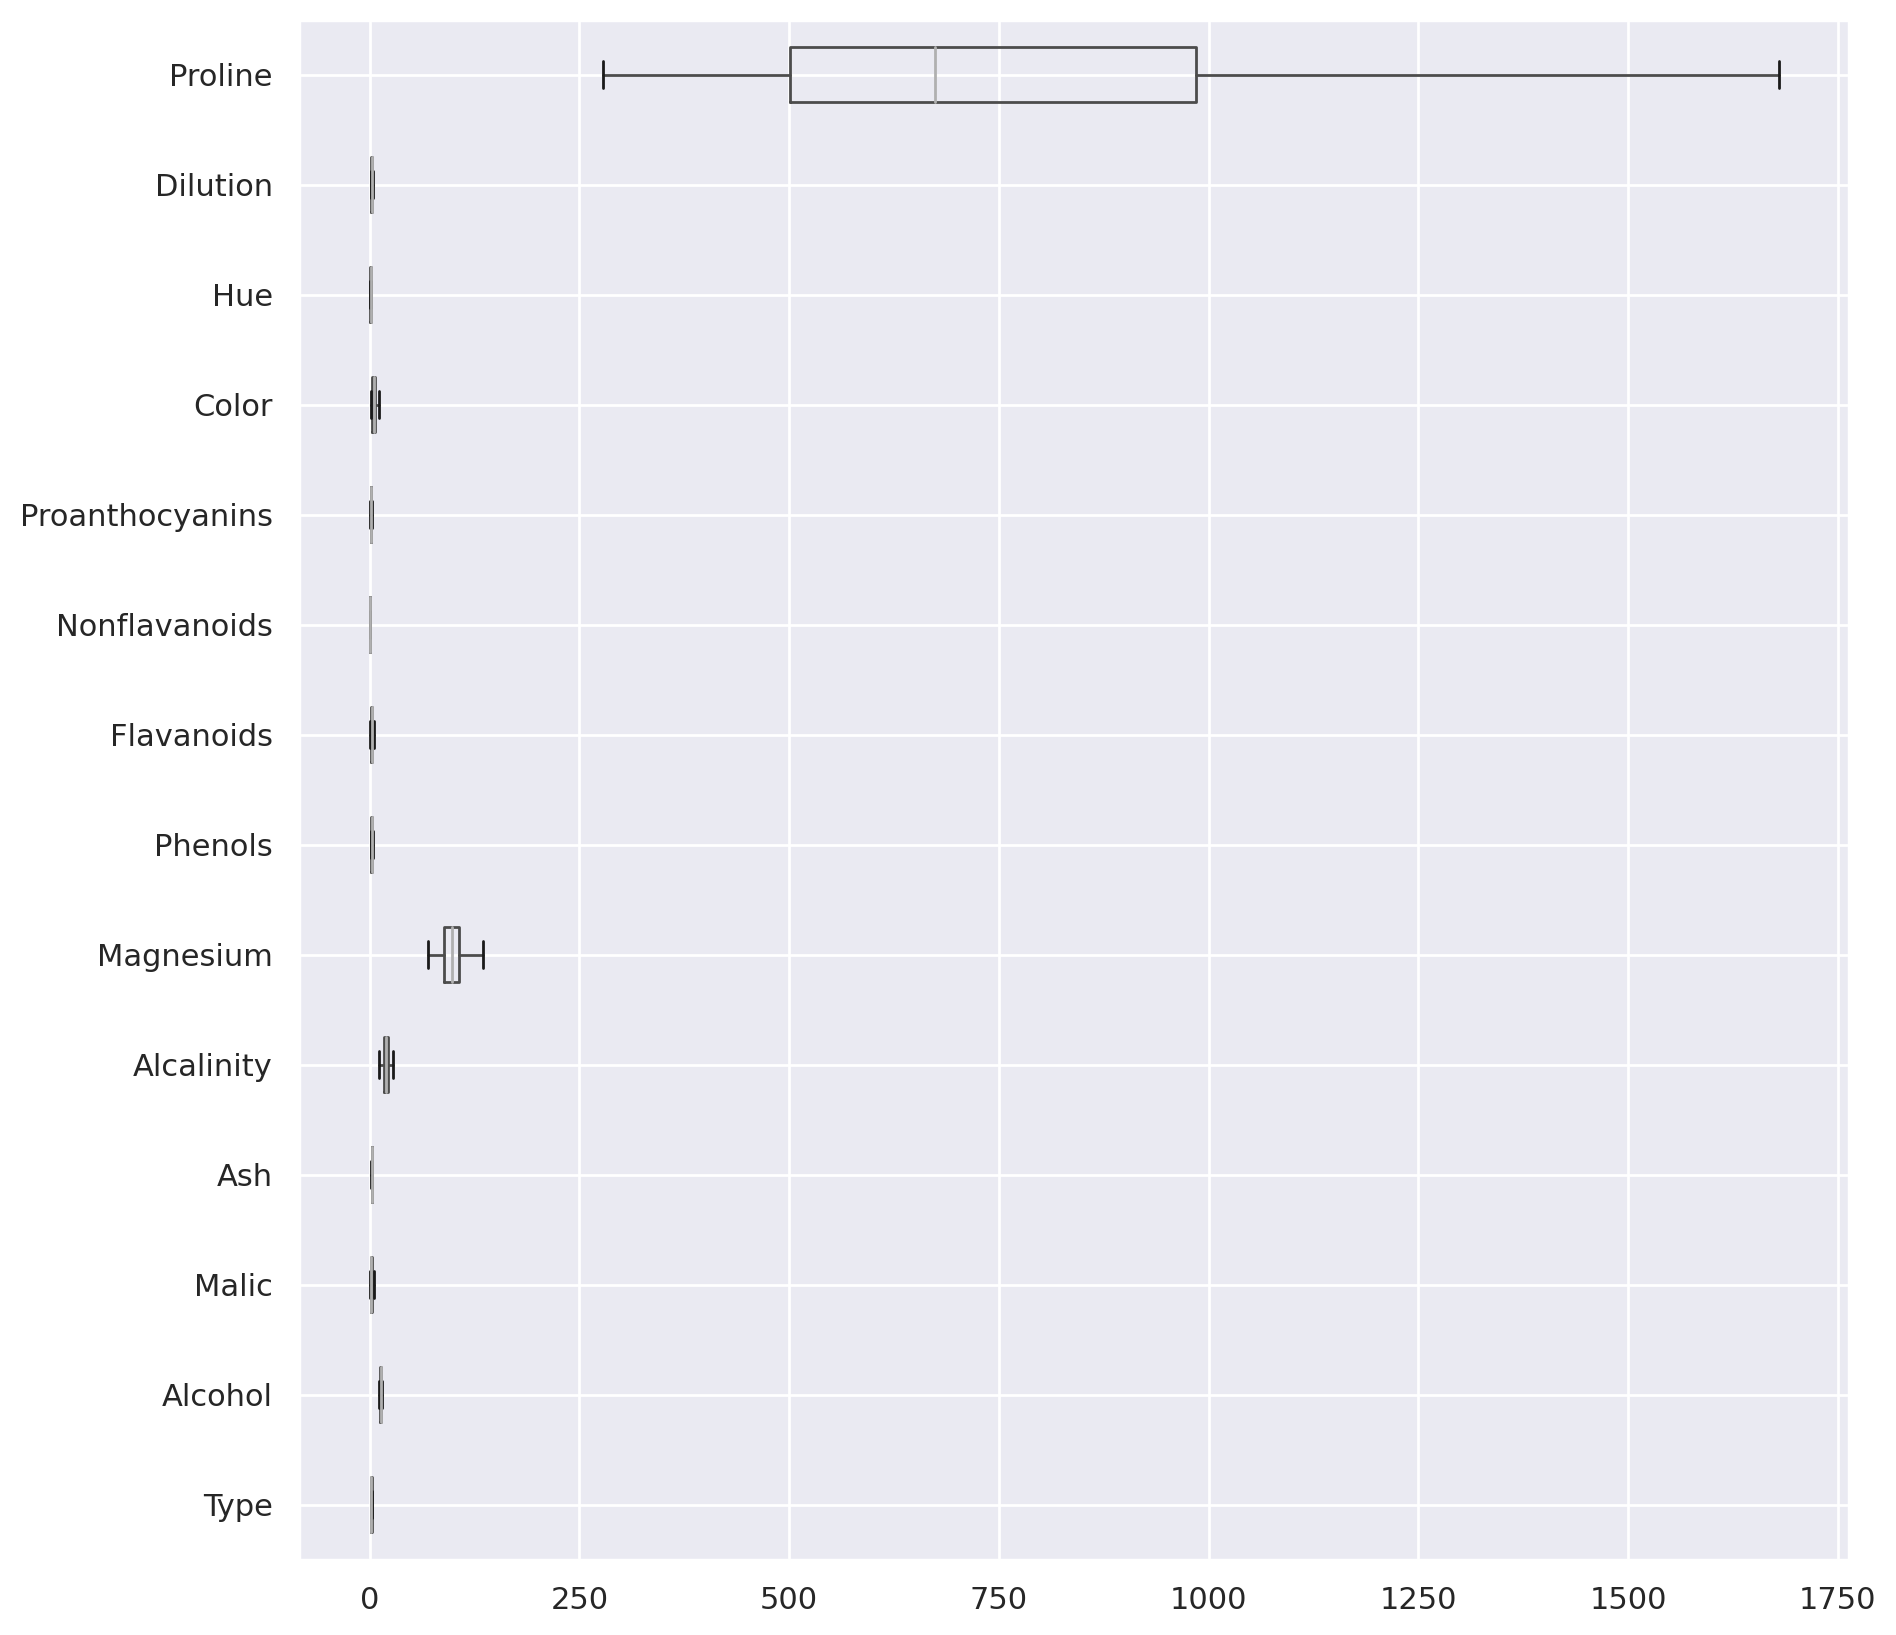

In [10]:
# Boxplot
data.boxplot(vert = False, figsize=(10,10))
plt.show()

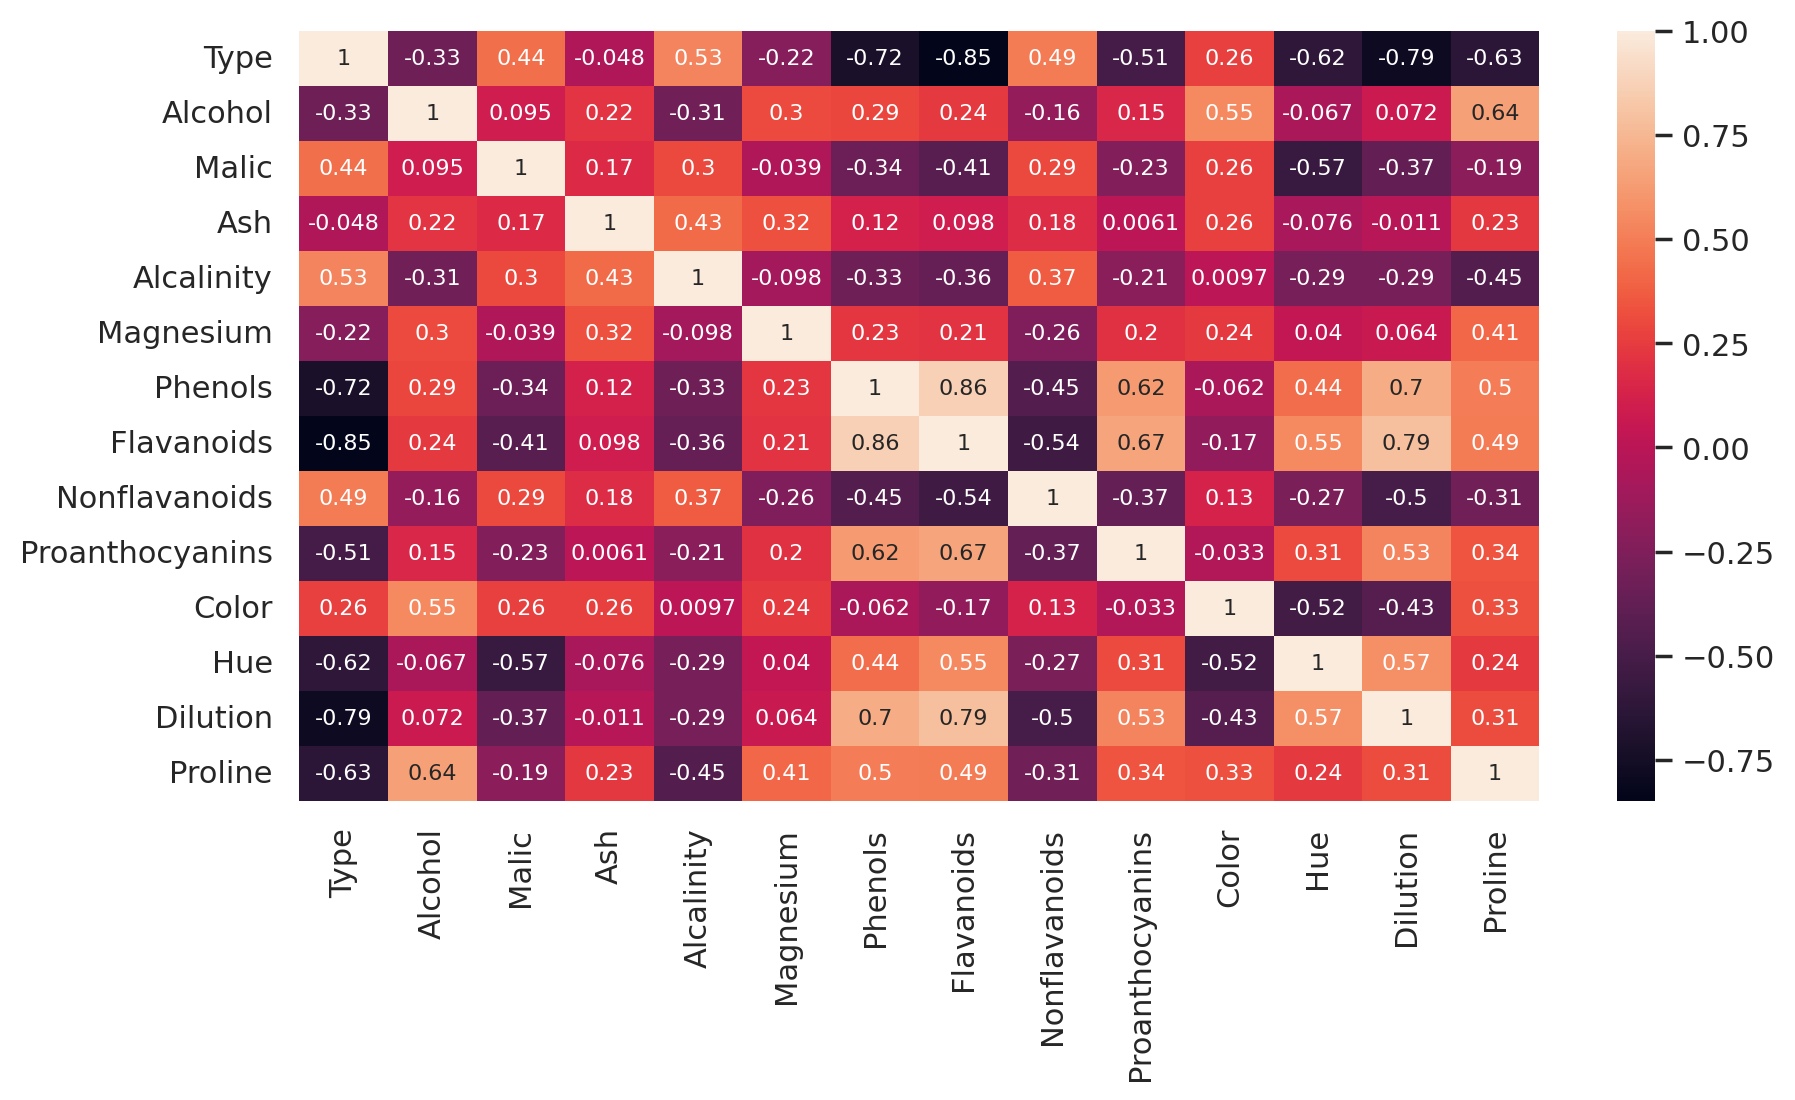

In [11]:
#Correlation
corr = data.corr()
sns.heatmap(corr, annot=True,annot_kws={"size":8})
plt.show()

* Columns "Type" and "Flavanoids" are highly negatively correlated
* Columns "Phenols" and "Flavanoids" are highly positively correlated

## Task 2: Dimensionality Reduction with PCA:
1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of 1.
2.  Implement PCA to reduce the dimensionality of the dataset.
3.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.
4.	Transform the original dataset into the principal components.

#### As, column "Type" is categorical in nature, we will drop this column and use it evaluate the performance of the model

In [14]:
# X & y
X = data.drop('Type', axis=1)
y = data['Type']

In [15]:
#Standardize the features
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X, columns=X.columns)
scaled_X.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.565534,0.240640,-1.182882,2.057111,0.808997,1.034819,-0.659563,1.264740,0.266954,0.366610,1.847920,1.013009
1,0.246290,-0.501728,-0.862176,-2.524956,0.038639,0.568648,0.733629,-0.820719,-0.549904,-0.291923,0.410768,1.113449,0.965242
2,0.196879,0.026948,1.153315,-0.267832,0.113397,0.808997,1.215533,-0.498407,2.199012,0.284696,0.322451,0.788587,1.395148
3,1.691550,-0.346771,0.506837,-0.816862,1.010496,2.491446,1.466525,-0.981875,1.067105,1.225029,-0.428246,1.184071,2.334574
4,0.295700,0.236596,1.913878,0.464208,1.384287,0.808997,0.663351,0.226796,0.420301,-0.318536,0.366610,0.449601,-0.037874


In [16]:
# Describe scaled data
scaled_X.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,2.395088e-16,-4.478315e-16,-3.592632e-16,-7.983626e-17,0.000000,-3.991813e-16,3.592632e-16,2.395088e-16,-4.989766e-17,-7.983626e-17,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.449701e+00,-2.578195e+00,-2.662213e+00,-2.204108e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.113014e+00,-1.666938e+00,-2.106273e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.635217e-01,-5.959788e-01,-6.948555e-01,-8.584597e-01,-0.885468,-8.275393e-01,-7.401412e-01,-6.038048e-01,-8.064445e-01,-7.704749e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.242499e-01,-2.555683e-02,6.682950e-03,-1.108774e-01,0.095960,1.061497e-01,-1.760948e-01,-5.581813e-02,-1.544213e-01,3.541993e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.855158e-01,7.254987e-01,6.167164e-01,5.619467e-01,0.808997,8.490851e-01,6.095413e-01,6.538695e-01,5.153441e-01,7.198786e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,2.709072e+00,2.707715e+00,2.584074e+00,2.692556e+00,2.539515,3.062832e+00,2.402403e+00,2.540381e+00,2.498027e+00,2.955409e+00,1.960915e+00,2.971473e+00


### $Implementation \ \ of \ \ PCA $

In [20]:
# Implimentation of PCA on scaled data
pca = PCA()
pcs = pca.fit(scaled_X)

In [21]:
# PCA Explained Variance
pca.explained_variance_ratio_

array([0.36475803, 0.19609775, 0.10911182, 0.07062378, 0.06296983,
       0.04815067, 0.04031504, 0.02744533, 0.02232516, 0.01931106,
       0.01755433, 0.01326634, 0.00807088])

In [22]:
# Commulative PCA Explained Variance
np.cumsum(pca.explained_variance_ratio_)

array([0.36475803, 0.56085577, 0.66996759, 0.74059137, 0.8035612 ,
       0.85171187, 0.89202691, 0.91947224, 0.9417974 , 0.96110846,
       0.97866279, 0.99192912, 1.        ])

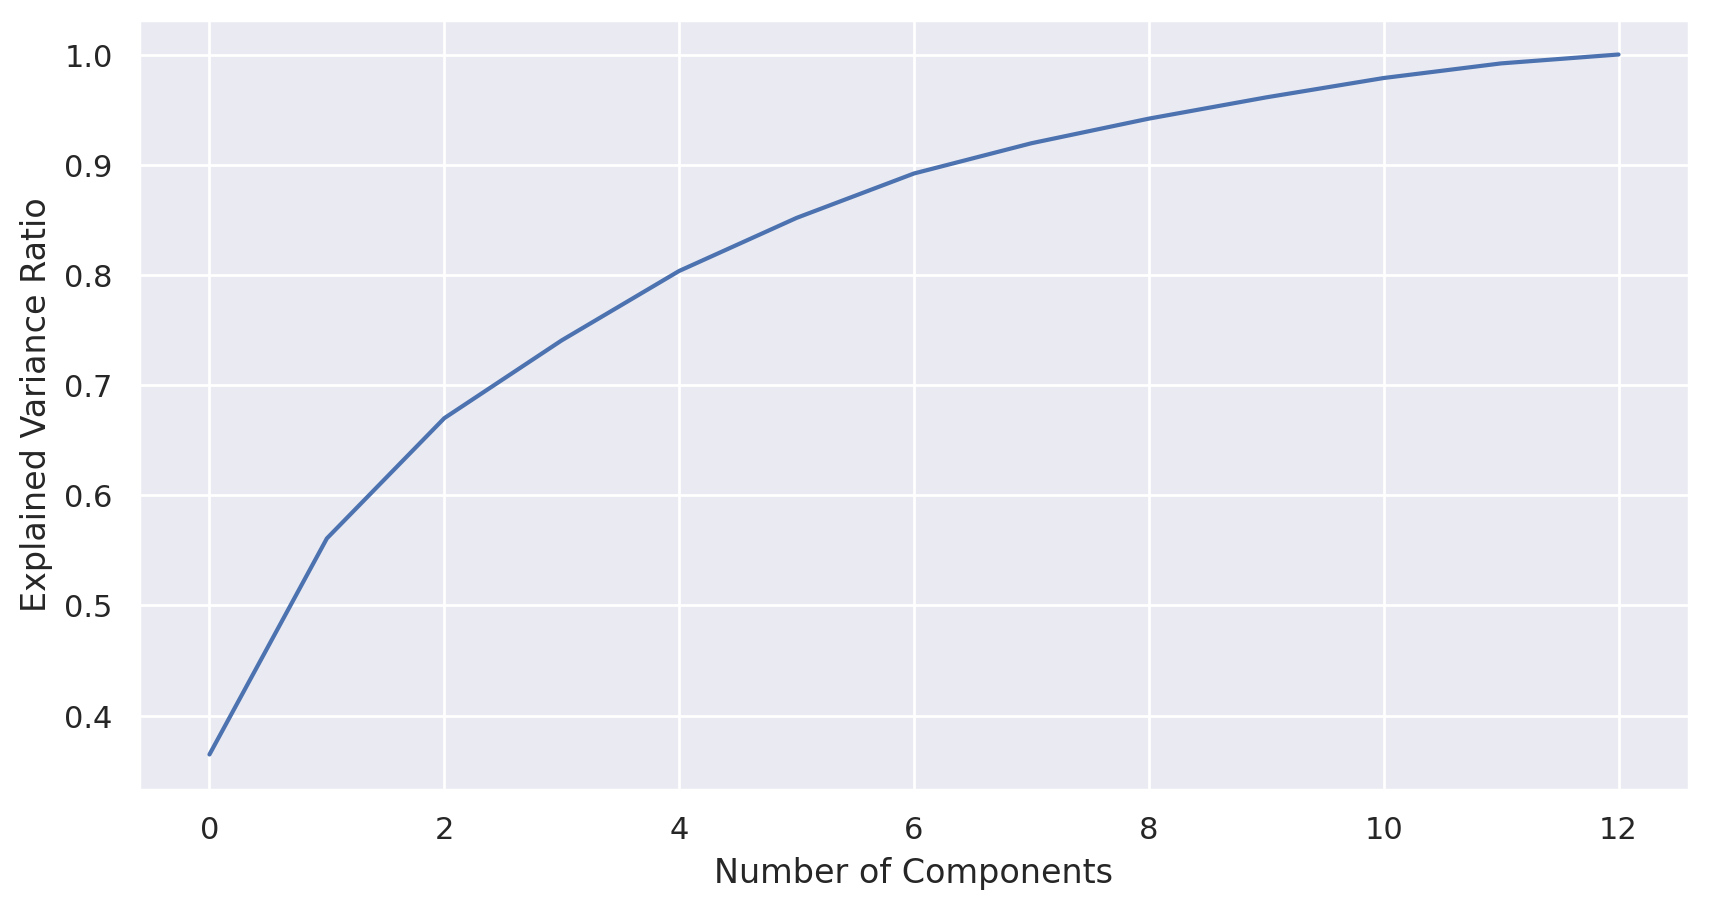

In [23]:
# Scree Plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

* first 7 Principal Components commulatively explains around 91% of variance, so we will choose first 8 PCs

In [25]:
# @title $Choose \ \ PCA \ \ Components$
n_comp = 7 # @param {type:"integer"}

pca = PCA(n_components=n_comp)
pcs = pca.fit_transform(scaled_X)
pcs

array([[ 3.35814747, -1.52022185, -0.12637492, ...,  0.71089096,
        -0.17664455,  0.70115415],
       [ 2.22921481,  0.33326137, -2.04283756, ..., -0.10744766,
        -0.98490211,  0.04800137],
       [ 2.54005743, -1.03695315,  1.01884481, ..., -0.36311262,
         0.53766636,  0.41269113],
       ...,
       [-2.67116907, -2.86530059, -0.97512583, ...,  1.18509754,
         0.3541478 ,  0.85350446],
       [-2.37160346, -2.39380794, -0.56148477, ...,  0.65865135,
         1.25232522,  0.81313133],
       [-3.22745394, -2.80053456,  1.03090733, ..., -0.99799937,
         0.23182472, -0.13011951]])

In [28]:
pca_col_names = [('PC'+str(i)) for i in range(1,n_comp+1)]
pca_data = pd.DataFrame(pcs, columns=pca_col_names)
pca_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,3.358147,-1.520222,-0.126375,-0.224356,0.710891,-0.176645,0.701154
1,2.229215,0.333261,-2.042838,-0.365783,-0.107448,-0.984902,0.048001
2,2.540057,-1.036953,1.018845,0.766907,-0.363113,0.537666,0.412691
3,3.781124,-2.782566,-0.149224,0.593304,-0.273054,0.132210,-0.394978
4,1.016872,-0.955225,2.113169,-0.431732,0.357108,-0.386733,0.487160


## Task 3: Clustering with Original Data:
1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.
2.	Visualize the clustering results using appropriate plots.
3.	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.


In [29]:
# K-means Clustering
from sklearn.cluster import KMeans
km = KMeans()

Text(0.5, 1.0, 'Elbow Graph')

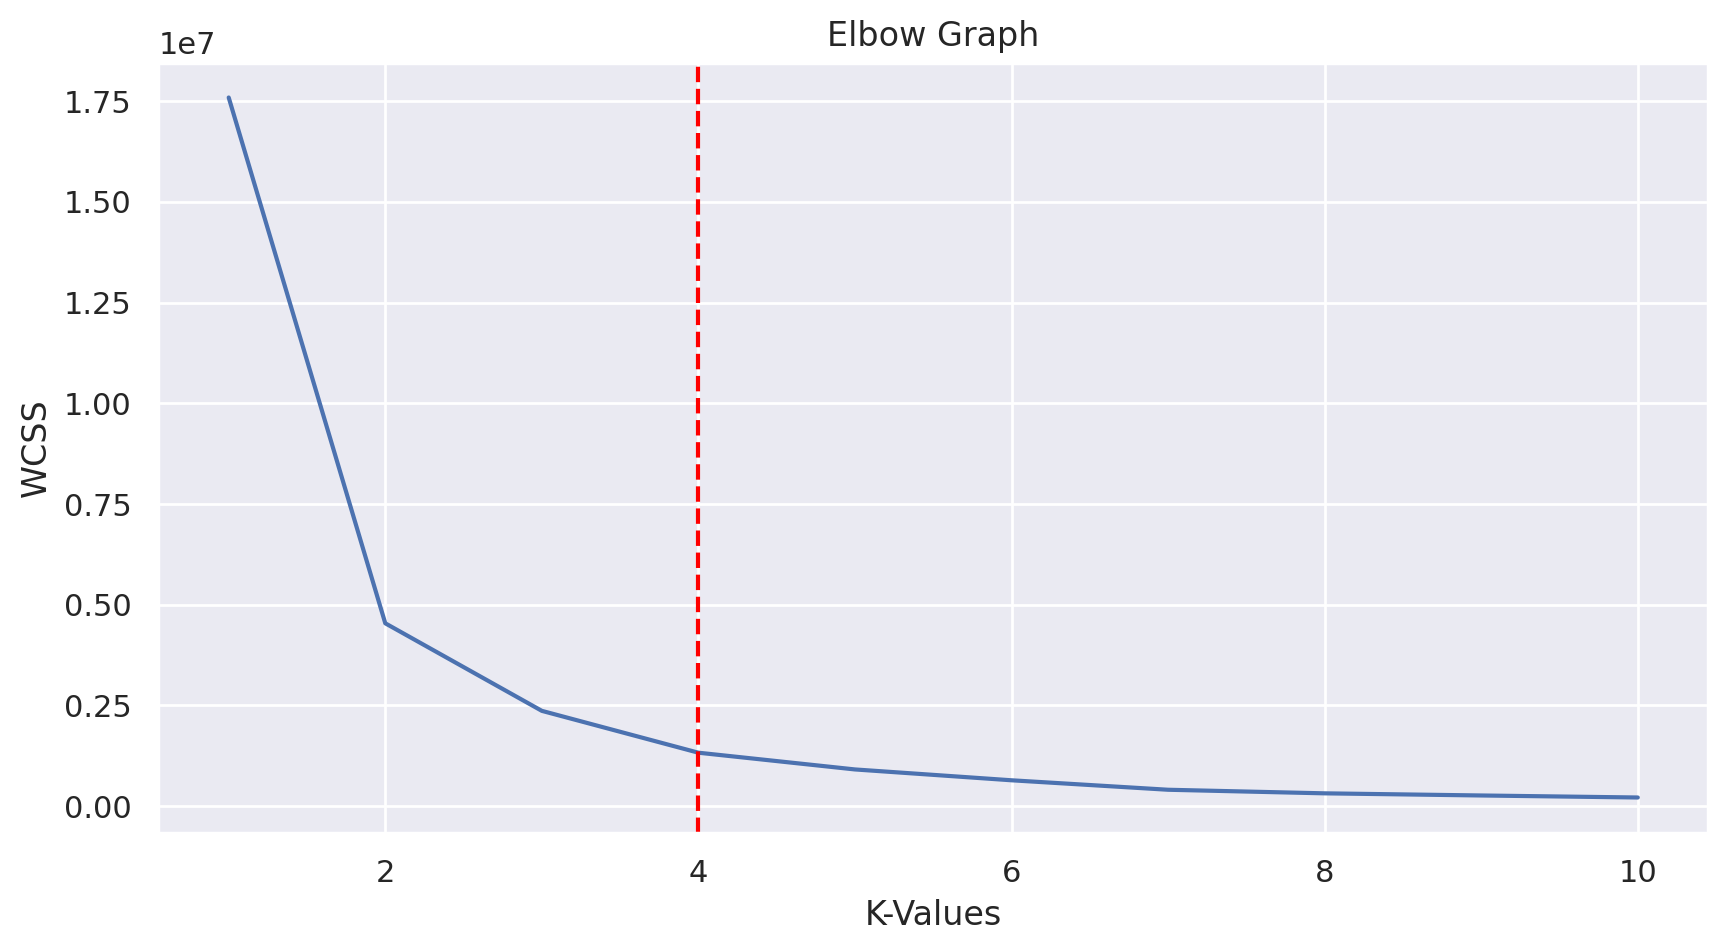

In [31]:
# WCSS Elbow Graph
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i, n_init = 10)
    km.fit_predict(X)
    wcss.append(km.inertia_)

plt.plot(range(1,11),wcss)
plt.axvline(x = 4, linestyle = '--', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

* From Elbow graph it is observed that there are 4 clusters, as graph flattens after 4

In [32]:
# Hyperparameter Tunning
from sklearn.metrics import silhouette_score
for i in range(2,11):
    print('n_clusters =',i)
    km = KMeans(n_clusters=i, n_init = 10)
    yp = km.fit_predict(X)    # Cluster Labels
    print('silhouette_score',round(silhouette_score(data,yp),4))
    print('----------------------------')

n_clusters = 2
silhouette_score 0.6571
----------------------------
n_clusters = 3
silhouette_score 0.5716
----------------------------
n_clusters = 4
silhouette_score 0.5614
----------------------------
n_clusters = 5
silhouette_score 0.5497
----------------------------
n_clusters = 6
silhouette_score 0.5664
----------------------------
n_clusters = 7
silhouette_score 0.5634
----------------------------
n_clusters = 8
silhouette_score 0.5415
----------------------------
n_clusters = 9
silhouette_score 0.5304
----------------------------
n_clusters = 10
silhouette_score 0.5193
----------------------------


* for n_clusters = 2 silhouette score is maximum, hence for final model building we should choose 2 clusters.

In [33]:
#Davies–Bouldin index
from sklearn.metrics import davies_bouldin_score

for i in range(2,11):
    print('n_clusters =',i)
    km = KMeans(n_clusters=i, n_init = 10)
    yp = km.fit_predict(X)    # Cluster Labels
    print('Davies–Bouldin index',round(davies_bouldin_score(data, yp),4))
    print('----------------------------')

n_clusters = 2
Davies–Bouldin index 0.4785
----------------------------
n_clusters = 3
Davies–Bouldin index 0.5331
----------------------------
n_clusters = 4
Davies–Bouldin index 0.5433
----------------------------
n_clusters = 5
Davies–Bouldin index 0.5438
----------------------------
n_clusters = 6
Davies–Bouldin index 0.4645
----------------------------
n_clusters = 7
Davies–Bouldin index 0.4566
----------------------------
n_clusters = 8
Davies–Bouldin index 0.4943
----------------------------
n_clusters = 9
Davies–Bouldin index 0.5176
----------------------------
n_clusters = 10
Davies–Bouldin index 0.5338
----------------------------


* Davies_Bouldin_Score is minimum for n_clusters = 7, so DB score tells us that there arer 7 clusters

#### Since we already knew there are three clusters, lets choose n_clusters=3

In [54]:
# Model for n_clusters = 3
km = KMeans(n_clusters=3, n_init = 10,random_state=3)
yp_X = km.fit_predict(X)
yp_X

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2], dtype=int32)

In [55]:
clustered_data = data.copy()
clustered_data['clusters'] = yp_X
clustered_data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusters
0,1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,1,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,1,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


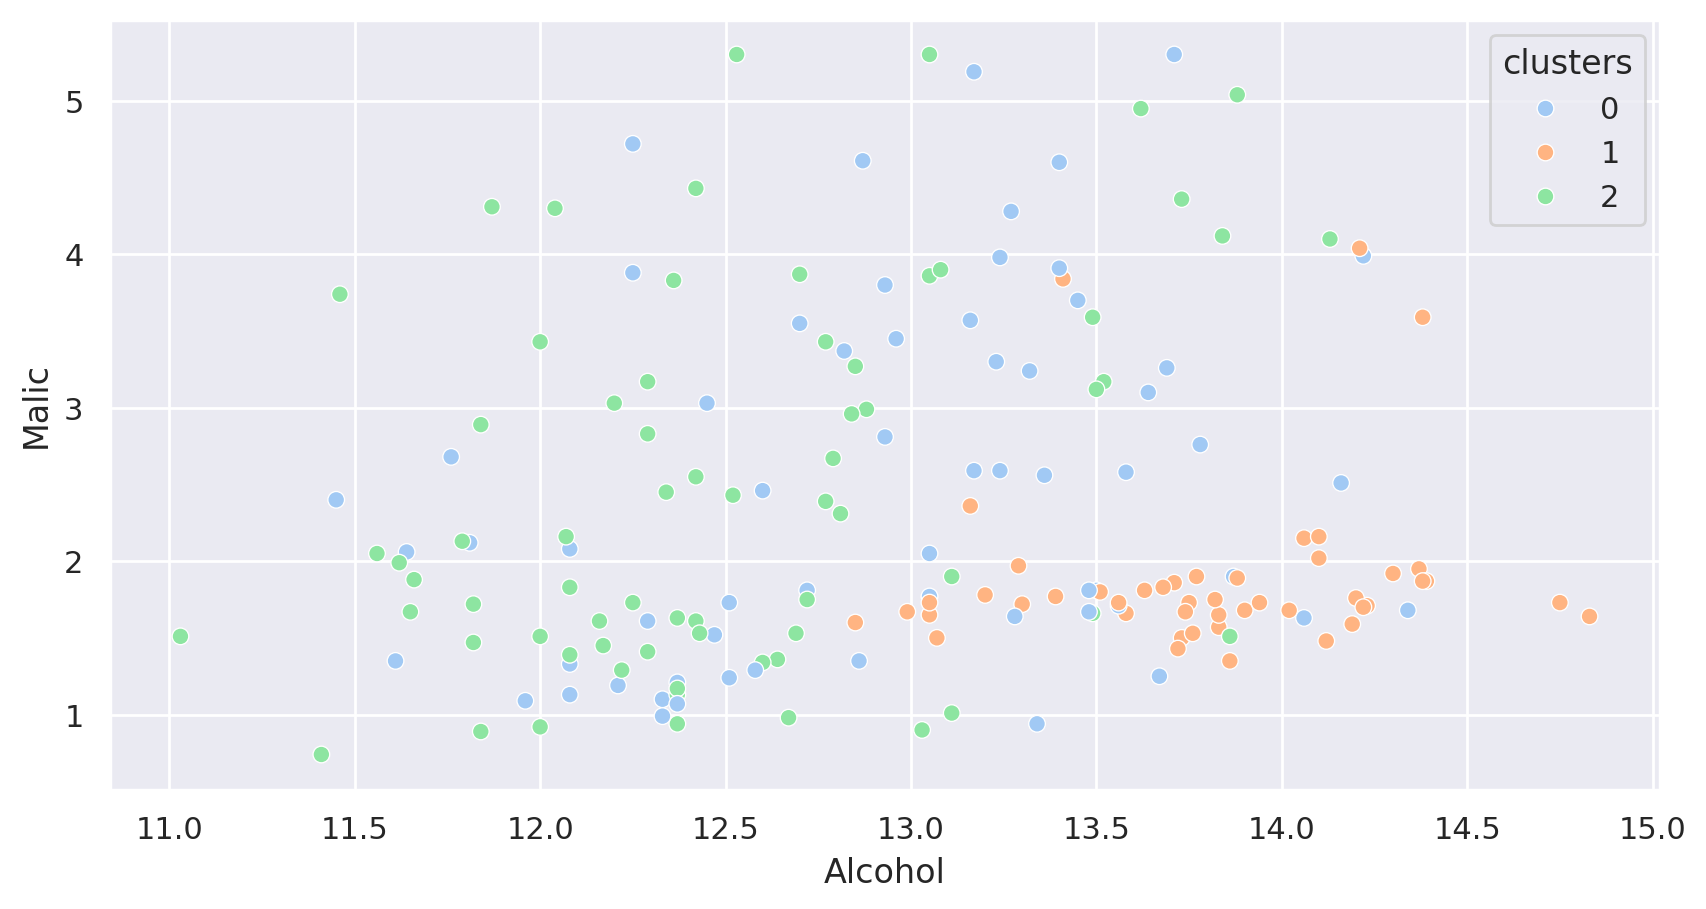

In [57]:
sns.scatterplot(x=clustered_data['Alcohol'], y=clustered_data['Malic'], hue=clustered_data['clusters'], palette='pastel')
plt.show()

### We can see here that clusters are not properly separated when we apply k-means algorithm without performing PCA

In [ ]:
# Model for n_clusters = 4
km = KMeans(n_clusters=3, n_init = 10,)
yp = km.fit_predict(pca_data)
yp

In [ ]:
data['clusters'] = yp
data.head()

In [ ]:
sum(data['Type']==data['clusters'])

In [ ]:
#Evaluation of Kmeans
from sklearn.metrics import silhouette_score
silhouette_score(new_data,yp)

In [ ]:
# Model for n_clusters = 7
km = KMeans(n_clusters=7, n_init = 10)
yp = km.fit_predict(data)
yp

In [ ]:
#Evaluation of Kmeans
from sklearn.metrics import silhouette_score
silhouette_score(data,yp)

## Task 4: Clustering with PCA Data:
1.	Apply the same clustering algorithm to the PCA-transformed dataset.
2.	Visualize the clustering results obtained from PCA-transformed data.
3.	Compare the clustering results from PCA-transformed data with those from the original dataset.


* For n_clusters =3, Davies–Bouldin index is lowest, hence for final model building we will choose 3 clusters.

In [58]:
# K-means Clustering
from sklearn.cluster import KMeans
km = KMeans()

Text(0.5, 1.0, 'Elbow Graph')

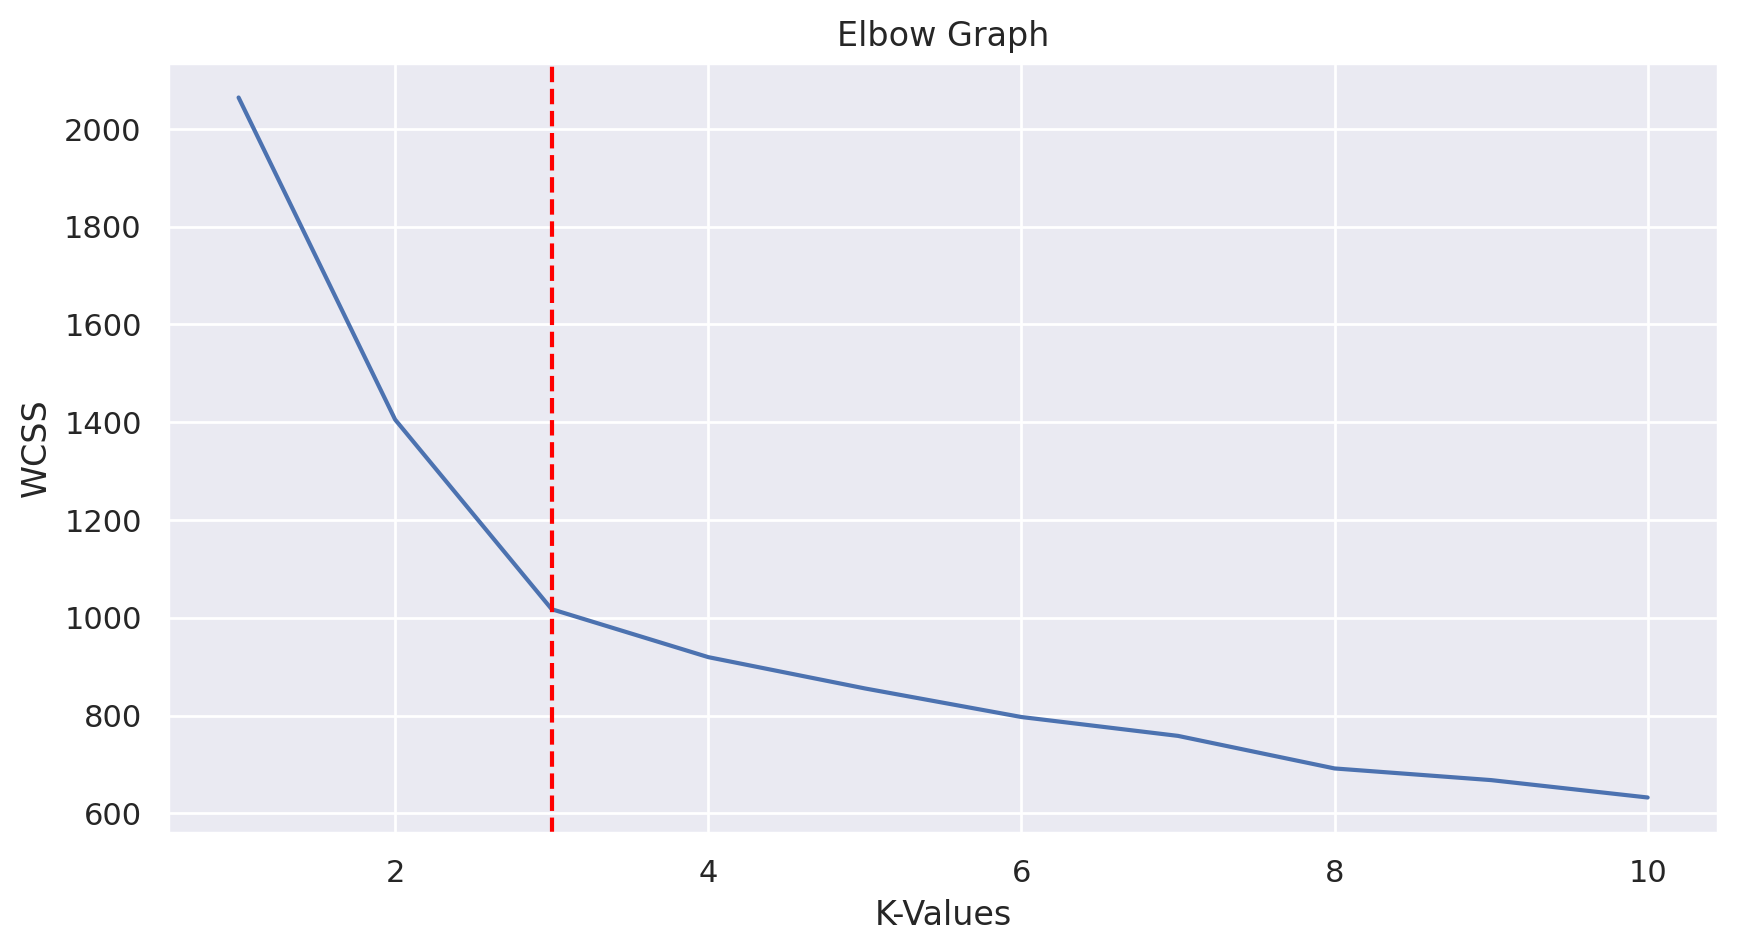

In [59]:
# WCSS Elbow Graph
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i, n_init = 10)
    km.fit_predict(pca_data)
    wcss.append(km.inertia_)

plt.plot(range(1,11),wcss)
plt.axvline(x = 3, linestyle = '--', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

In [63]:
# Hyperparameter Tunning
from sklearn.metrics import silhouette_score
for i in range(2,11):
    print('n_clusters =',i)
    km = KMeans(n_clusters=i, n_init = 10)
    yp = km.fit_predict(pca_data)    # Cluster Labels
    print('silhouette_score',round(silhouette_score(pca_data,yp),4))
    print('----------------------------')

n_clusters = 2
silhouette_score 0.3025
----------------------------
n_clusters = 3
silhouette_score 0.3279
----------------------------
n_clusters = 4
silhouette_score 0.2791
----------------------------
n_clusters = 5
silhouette_score 0.2667
----------------------------
n_clusters = 6
silhouette_score 0.229
----------------------------
n_clusters = 7
silhouette_score 0.2321
----------------------------
n_clusters = 8
silhouette_score 0.1854
----------------------------
n_clusters = 9
silhouette_score 0.1822
----------------------------
n_clusters = 10
silhouette_score 0.186
----------------------------


In [64]:
#Davies–Bouldin index

from sklearn.metrics import davies_bouldin_score

for i in range(2,11):
    print('n_clusters =',i)
    km = KMeans(n_clusters=i, n_init = 10)
    yp = km.fit_predict(pca_data)    # Cluster Labels
    print('Davies–Bouldin index',round(davies_bouldin_score(pca_data, yp),4))
    print('----------------------------')

n_clusters = 2
Davies–Bouldin index 1.3265
----------------------------
n_clusters = 3
Davies–Bouldin index 1.2145
----------------------------
n_clusters = 4
Davies–Bouldin index 1.5791
----------------------------
n_clusters = 5
Davies–Bouldin index 1.5849
----------------------------
n_clusters = 6
Davies–Bouldin index 1.6115
----------------------------
n_clusters = 7
Davies–Bouldin index 1.6559
----------------------------
n_clusters = 8
Davies–Bouldin index 1.5875
----------------------------
n_clusters = 9
Davies–Bouldin index 1.5017
----------------------------
n_clusters = 10
Davies–Bouldin index 1.5714
----------------------------


In [65]:
# Final Model for n_clusters = 3
km = KMeans(n_clusters=3, n_init = 10)
yp = km.fit_predict(pca_data)
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [66]:
clustered_pca_data = pca_data.copy()
clustered_pca_data['clusters'] = yp
clustered_pca_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,clusters
0,3.358147,-1.520222,-0.126375,-0.224356,0.710891,-0.176645,0.701154,0
1,2.229215,0.333261,-2.042838,-0.365783,-0.107448,-0.984902,0.048001,0
2,2.540057,-1.036953,1.018845,0.766907,-0.363113,0.537666,0.412691,0
3,3.781124,-2.782566,-0.149224,0.593304,-0.273054,0.132210,-0.394978,0
4,1.016872,-0.955225,2.113169,-0.431732,0.357108,-0.386733,0.487160,0


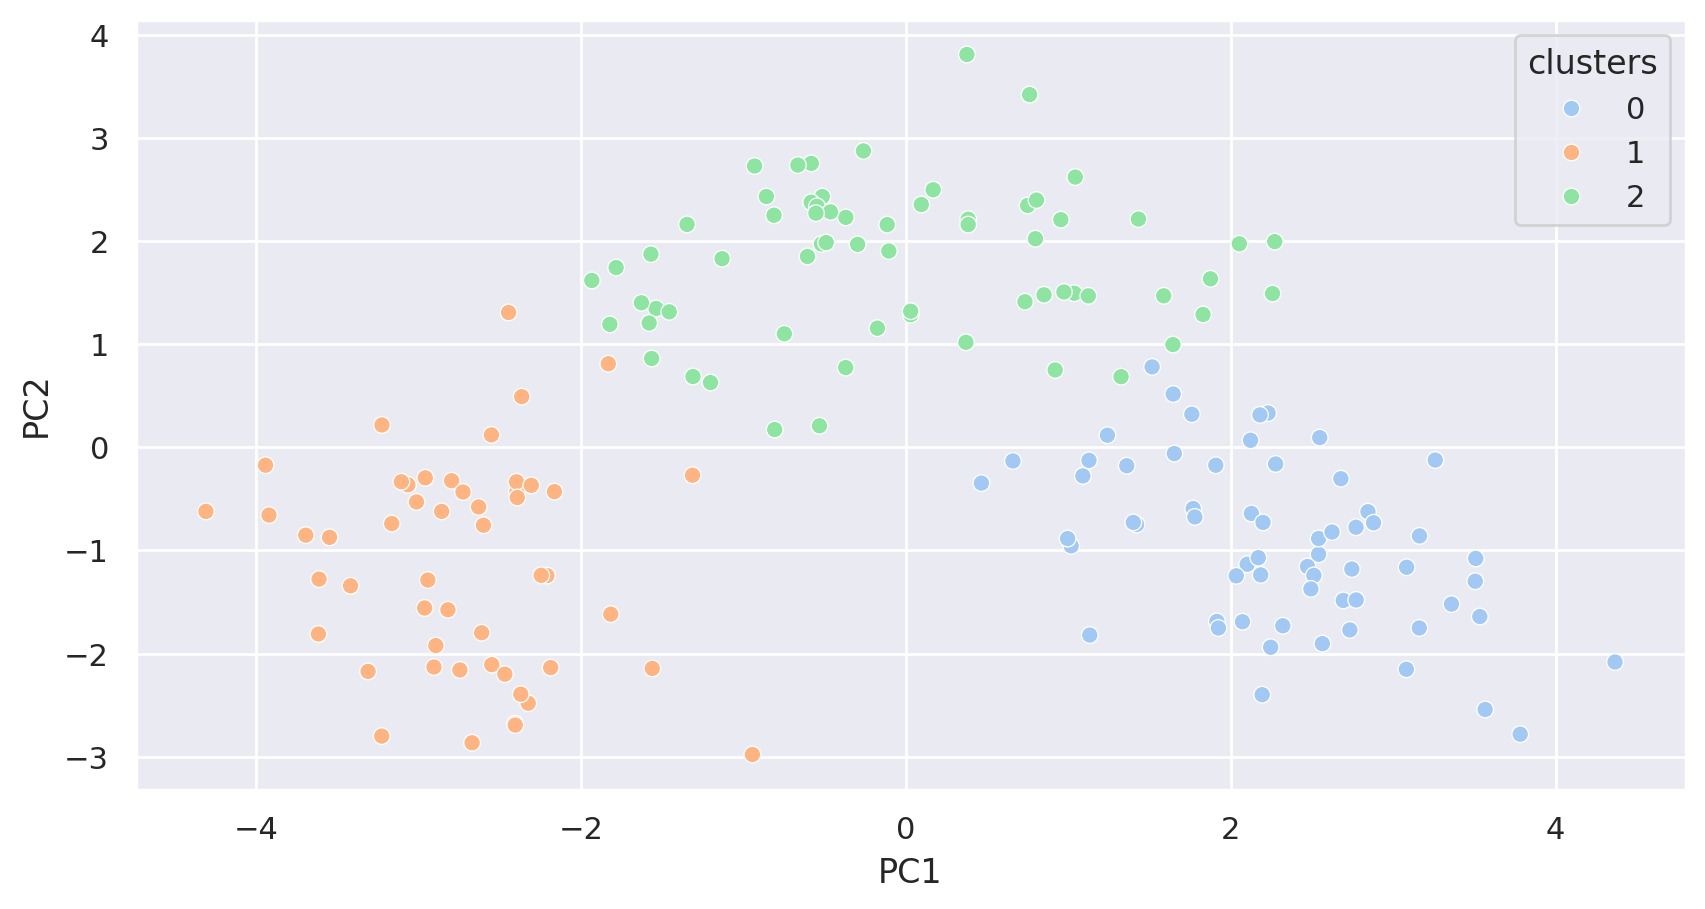

In [67]:
sns.scatterplot(x=clustered_pca_data['PC1'], y=clustered_pca_data['PC2'], hue=clustered_pca_data['clusters'], palette='pastel')
plt.show()

### We can see here that clusters are properly separated when we apply k-means algorithm after performing PCA